**<font color='blue'>F21DL Data Mining and Machine Learning: Your DM&ML Portfolio</font>**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc, silhouette_score
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC

from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import cv2  # OpenCV Python library for computer vision

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import itertools
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz
import pydotplus
import numpy as np
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score

In [ ]:
# Load the dataset
xtrain = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/CompleteDataSet/x_train_all.csv')
ytrain = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/CompleteDataSet/y_train_all.csv')



In [ ]:
xtest = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/CompleteDataSet/x_test_all.csv')
ytest = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/CompleteDataSet/y_test_all.csv')

In [ ]:
X = xtrain.values
Y = ytrain.values

**<font color='blue'> Data Exploration</font>**

In [ ]:
# Display the first few rows of the dataset
print(xtrain.head(5))

      0     1     2     3     4      5      6      7      8      9  ...  \
0  78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4  74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   

    2294  2295  2296   2297  2298  2299  2300   2301   2302   2303  
0   87.0  79.0  72.0   76.0  83.0  95.0  99.0   98.0   95.0   94.0  
1   96.0  93.0  85.0   77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0   80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0   82.0  77.0  72.0  70.0   72.0   81.0   88.0  
4  100.0  98.0  99.0  100.0  99.0  89.0  78.0   66.0   68.0   72.0  

[5 rows x 2304 columns]


In [ ]:
ytrain.head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
xtrain.shape

(9690, 2304)

In [ ]:
ytrain.shape

(9690, 1)

In [ ]:
# Summary statistics
xtrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


**<font color='blue'> Missing values analysis</font>**

In [ ]:
# Check for missing values
missing_values = xtrain.isnull().sum()
print("Missing Values:")
print("----------------")
print(missing_values)
## There is no missing values...

Missing Values:
----------------
0       0
1       0
2       0
3       0
4       0
       ..
2299    0
2300    0
2301    0
2302    0
2303    0
Length: 2304, dtype: int64


**<font color='blue'> Findings</font>**

There is no missing values in the dataset and so we are good here..

**<font color='blue'> Exploratory Data Analysis</font>**

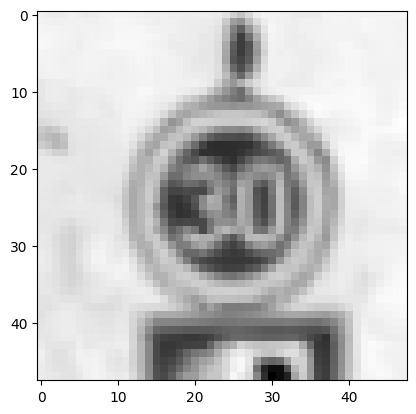

In [ ]:
some_digit = X[1500]
some_digit_image = some_digit.reshape(48, 48)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

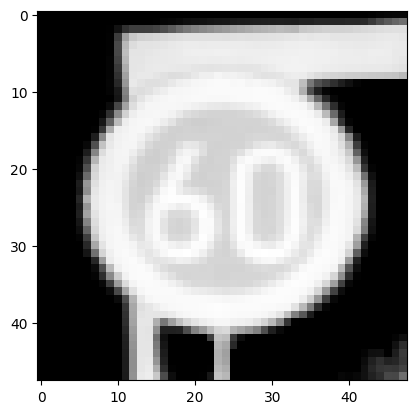

In [ ]:
some_digit = X[5000]
some_digit_image = some_digit.reshape(48, 48)
plt.imshow(some_digit_image, cmap=plt.cm.binary)
plt.show()

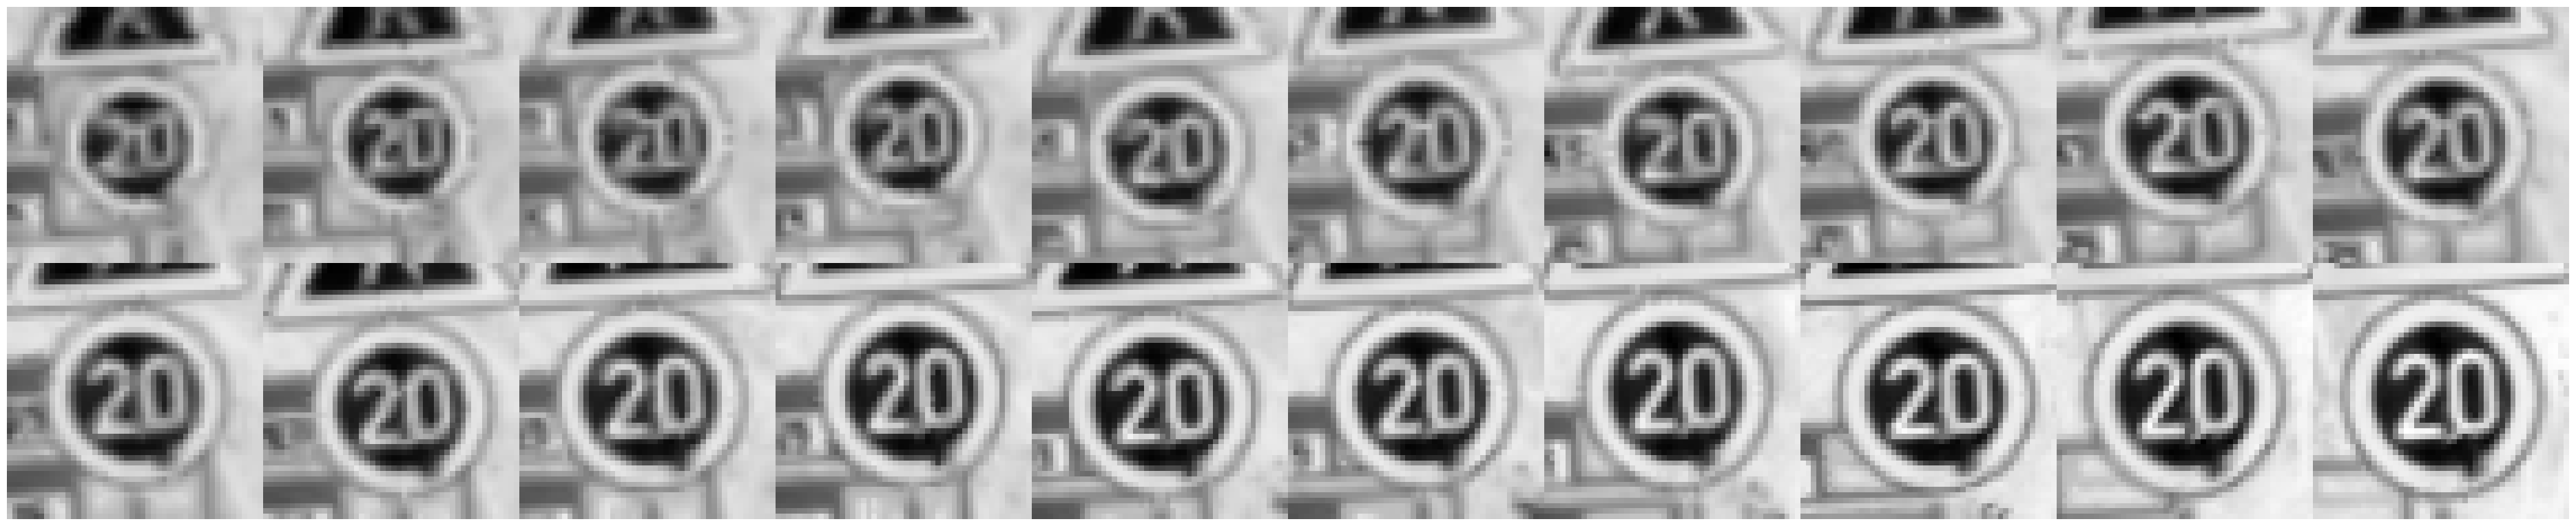

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 48  # Change the size to match your image size (48x48)
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(48, 48))
example_images = X[:20]
plot_digits(example_images, images_per_row=10)
plt.show()


**<font color='blue'>Findings</font>**

Looking at above sample traffic signal images, they are speed limit signals like 30km/hour, 60km/hour, etc..

**<font color='blue'> Outlier analysis</font>**

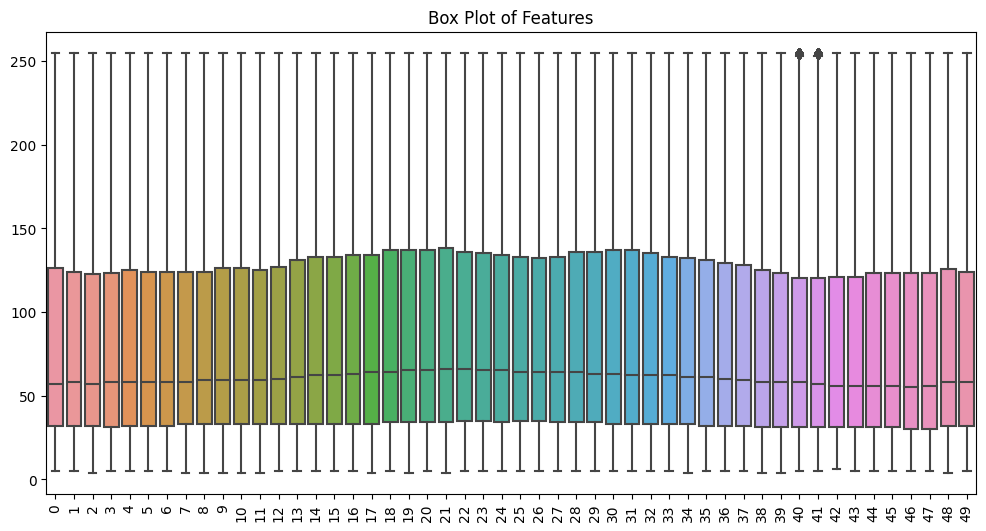

In [ ]:
#Randomly checking if the feature has any outliers
subset_of_features = xtrain.iloc[:, :50]  # Example: Checking outliers for the first 50 features
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_of_features)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

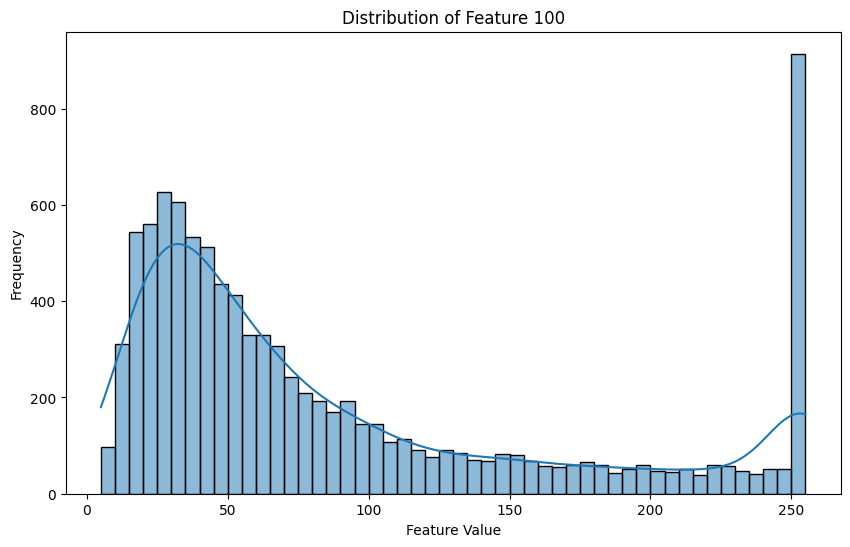

Number of outliers: 0
Minimum value: 5.0
Maximum value: 255.0
Mean value: 88.88844169246646
Standard deviation: 76.52516290632772
Lower threshold for outliers: -293.73737283917217
Upper threshold for outliers: 471.5142562241051


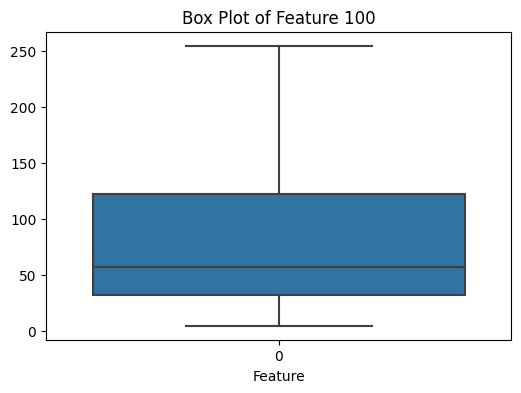

In [ ]:

# Need to visualize sample single image feature to understand the pattern, for example am taking
# index 0, 100, 1000 for my analysis
feature_index = 100
selected_feature = xtrain.iloc[:, feature_index]

# Visualize the distribution of the selected feature
plt.figure(figsize=(10, 6))
sns.histplot(selected_feature, bins=50, kde=True)
plt.title(f'Distribution of Feature {feature_index}')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

# Define a threshold for outliers (e.g., values outside of 3 standard deviations from the mean)
threshold = 5  # You can adjust this threshold based on your data and problem

# Identify outliers
mean_value = np.mean(selected_feature)
std_deviation = np.std(selected_feature)
lower_threshold = mean_value - threshold * std_deviation
upper_threshold = mean_value + threshold * std_deviation

outliers = selected_feature[(selected_feature < lower_threshold) | (selected_feature > upper_threshold)]

# Print information about outliers
print(f'Number of outliers: {len(outliers)}')
print(f'Minimum value: {selected_feature.min()}')
print(f'Maximum value: {selected_feature.max()}')
print(f'Mean value: {mean_value}')
print(f'Standard deviation: {std_deviation}')
print(f'Lower threshold for outliers: {lower_threshold}')
print(f'Upper threshold for outliers: {upper_threshold}')

# Optionally, you can visualize the outliers using a box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=selected_feature)
plt.title(f'Box Plot of Feature {feature_index}')
plt.xlabel('Feature')
plt.show()


**<font color='blue'>Findings</font>**

There are no outliers detected for this specific feature. All data points fall within the defined outlier threshold limits.

The absence of outliers for the set of sample feature suggests that it may not require us performing any outlier-specific treatment.

**<font color='blue'> Analyzing number of classes or labels</font>**

In [ ]:
# Check how many classes are available in ytrain
num_classes = ytrain['0'].nunique()
print(f"Number of unique classes: {num_classes}")

Number of unique classes: 10


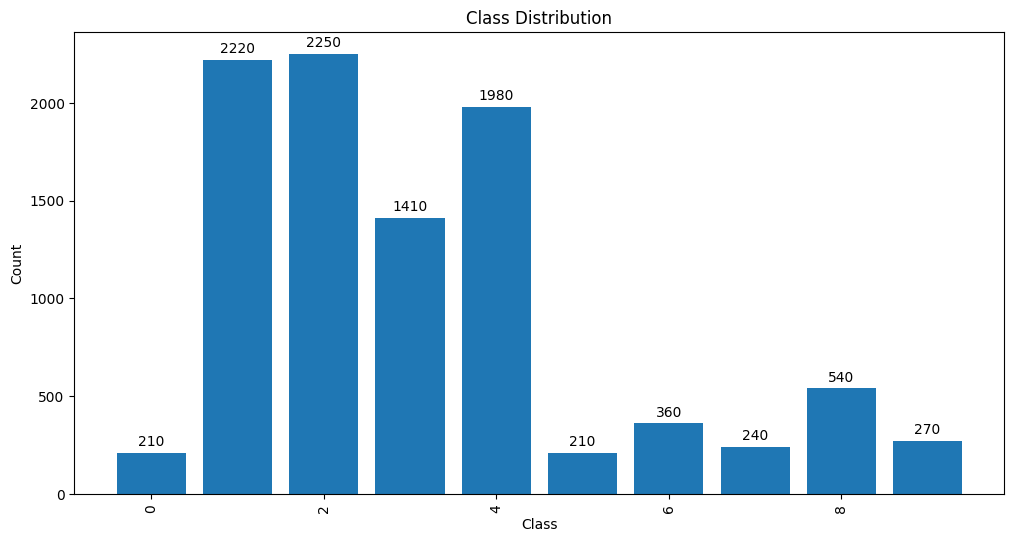

In [ ]:
class_counts = ytrain['0'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Sort the classes by count (optional)
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts['Class'], class_counts['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate class labels for better readability

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the label
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


**<font color='blue'>Findings</font>**

There is a significant class imbalance in the dataset. Class 2 and Class 1 have the highest counts (2250 and 2220, respectively), while other classes have considerably lower counts. This imbalance may pose challenges when training a machine learning model, as the model might be biased towards the majority classes.

To address this issue and improve model performance while avoiding overfitting problems, we can consider the following techniques:

**<span style="color:green">1. Class Balancing:</span>**  We might consider techniques to address class imbalance, such as oversampling the minority classes (creating more samples for the underrepresented classes) or undersampling the majority classes (reducing the number of samples for the overrepresented classes). Another approach is using synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique).

**<span style="color:green">2. Data Augmentation:</span>** Since this is image data, data augmentation can be beneficial as well. Generate augmented images by applying random transformations like rotation, scaling, and flipping to increase the diversity of your dataset. This can help the model perform better on all classes.

Let's experiment with the above two techniques and validate their performances.

**<font color='blue'> Do we need to apply any preprocessing or normalization procedures? If so, why ?</font>**

Whether we need to perform feature scaling on our dataset depends on the machine learning algorithms
we plan to use and the nature of the features.

Here are some considerations to help you decide if feature scaling is necessary for our dataset:

1. Many machine learning algorithms are sensitive to the scale of features. Examples include gradient-based optimization algorithms (e.g., gradient descent), k-nearest neighbors, and support vector machines. Rescaling features can help these algorithms converge faster and produce better results.

2. Algorithms that rely on distance metrics, such as k-means clustering, hierarchical clustering, and some variants of principal component analysis (PCA), can be influenced by the scale of features.

***Tree-based algorithms are fairly insensitive to the scale of the features***

Related Articles:
    https://www.analyticsvidhya.com/blog/2022/10/frequently-asked-interview-questions-on-naive-bayes-classifier/#:~:text=A%20sure%20short%20answer%20should,will%20not%20require%20feature%20scaling.
    https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048#:~:text=Feature%20scaling%20is%20the%20process,need%20to%20perform%20feature%20scaling.
    https://atoti.io/articles/when-to-perform-a-feature-scaling/

Bayes Algorithm
Do we need feature scaling for Bayes Net?

Naïve Bayes is generally not sensitive to feature scaling because it's based on probability and conditional independence assumptions rather than the absolute values of features. This property makes Naïve Bayes one of the few machine learning algorithms that often work well without the need for feature scaling.

**<font color='blue'> Multinomial NB</font>**

**<font color='blue'> Preprocessing - Experiment1: Class Balancing (Over Sampling)</font>**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data
# We can proceed to train the machine learning model on this balanced dataset


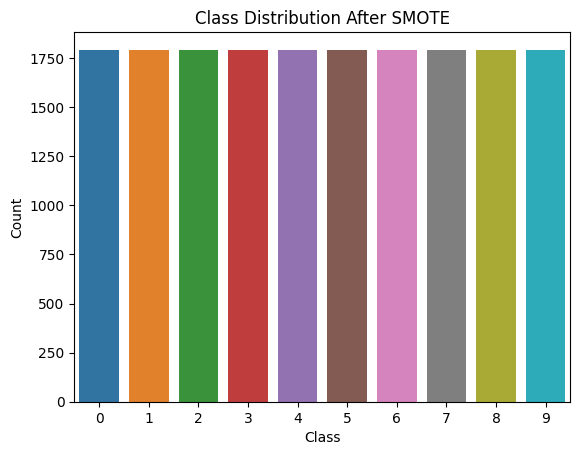

In [ ]:
# Visualize oversampled data
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perfect to go!

### Model training, prediction and validation on original data (Multiclass classification)

In [ ]:
# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Perform cross-validation and get predictions
y_pred = cross_val_predict(nb_classifier, X_train, y_train, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Generate a classification report
report = classification_report(y_train, y_pred)

# Create a confusion matrix
confusion = confusion_matrix(y_train, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy: 0.35036119711042313
              precision    recall  f1-score   support

           0       0.10      0.41      0.16       164
           1       0.43      0.18      0.25      1769
           2       0.43      0.29      0.34      1793
           3       0.34      0.39      0.36      1122
           4       0.40      0.63      0.49      1588
           5       0.19      0.66      0.30       166
           6       0.22      0.15      0.18       291
           7       0.30      0.32      0.31       193
           8       0.54      0.26      0.35       449
           9       0.23      0.27      0.25       217

    accuracy                           0.35      7752
   macro avg       0.32      0.35      0.30      7752
weighted avg       0.39      0.35      0.34      7752

Confusion Matrix:
 [[ 67  25  31  23  14   0   2   0   1   1]
 [355 311 326 230 423   9  44   4  14  53]
 [119 150 518 237 682  29  10   6   8  34]
 [ 59 100 165 435 327   8  12   0   2  14]
 [ 52 118 122 244 99

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model training and prediction on oversampled data

In [ ]:
# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Perform cross-validation and get predictions
y_pred = cross_val_predict(nb_classifier, X_train_resampled, y_train_resampled, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_resampled, y_pred)

# Generate a classification report
report = classification_report(y_train_resampled, y_pred)

# Create a confusion matrix
confusion = confusion_matrix(y_train_resampled, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.3611266034578918
              precision    recall  f1-score   support

           0       0.54      0.42      0.47      1793
           1       0.26      0.17      0.21      1793
           2       0.26      0.29      0.28      1793
           3       0.30      0.38      0.34      1793
           4       0.38      0.62      0.47      1793
           5       0.32      0.66      0.43      1793
           6       0.36      0.20      0.26      1793
           7       0.45      0.35      0.39      1793
           8       0.40      0.26      0.31      1793
           9       0.53      0.26      0.35      1793

    accuracy                           0.36     17930
   macro avg       0.38      0.36      0.35     17930
weighted avg       0.38      0.36      0.35     17930

Confusion Matrix:
 [[ 748  295  323  222  151    0   11    0    3   40]
 [ 364  307  329  240  412   20   42    6   16   57]
 [ 120  139  525  239  652   51   11    9    9   38]
 [  82  164  319  687  491   10   

Experiment2: Class Balancing (Under Sampling)

In [ ]:


# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the RandomUnderSampler to the training data only
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data with undersampling
# we can proceed to train your machine learning model on this balanced dataset


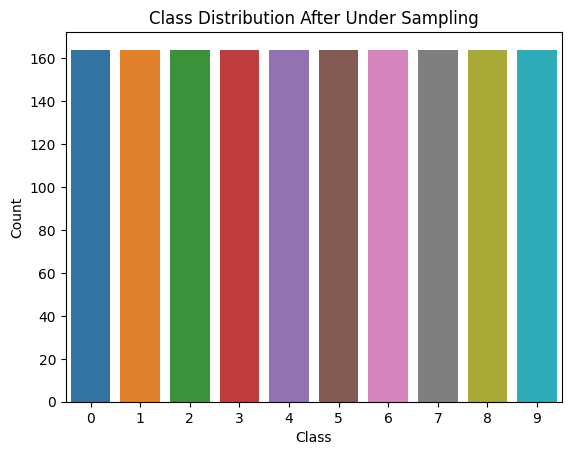

In [ ]:
# Visualize undersampled data
sns.countplot(x=y_train_under)
plt.title('Class Distribution After Under Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perfect to go!

In [ ]:
# Create a Multinomial Naïve Bayes classifier
nb = MultinomialNB()

# Perform cross-validation and get predictions
y_pred_under = cross_val_predict(nb, X_train_under, y_train_under, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_under, y_pred_under)

# Generate a classification report
report = classification_report(y_train_under, y_pred_under)

# Create a confusion matrix
confusion = confusion_matrix(y_train_under, y_pred_under)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.3567073170731707
              precision    recall  f1-score   support

           0       0.55      0.40      0.46       164
           1       0.27      0.16      0.21       164
           2       0.32      0.35      0.33       164
           3       0.30      0.45      0.36       164
           4       0.38      0.63      0.47       164
           5       0.32      0.65      0.43       164
           6       0.31      0.15      0.20       164
           7       0.45      0.29      0.36       164
           8       0.34      0.25      0.29       164
           9       0.42      0.23      0.29       164

    accuracy                           0.36      1640
   macro avg       0.37      0.36      0.34      1640
weighted avg       0.37      0.36      0.34      1640

Confusion Matrix:
 [[ 66  26  27  22  17   0   2   0   1   3]
 [ 28  27  34  22  37   0   6   0   4   6]
 [ 10  13  58  18  61   1   1   0   0   2]
 [  9   8  24  73  44   0   4   0   0   2]
 [  3  10  16  27 104

## Lets try the same experiment on binary dataset

### 1) Multinormial NB

In [ ]:
# Load the dataset
xtrain_bin = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/x_train_bin.csv')
ytrain_bin = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/y_train_bin.csv')

In [ ]:
xtrain_bin.info

<bound method DataFrame.info of          0     1     2     3     4      5      6      7      8      9  ...  \
0     78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1     73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2     72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3     67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4     74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   
...    ...   ...   ...   ...   ...    ...    ...    ...    ...    ...  ...   
2425  95.0  97.0  95.0  82.0  70.0   92.0  102.0  104.0  107.0  108.0  ...   
2426  55.0  55.0  58.0  64.0  57.0   51.0   57.0   64.0   64.0   67.0  ...   
2427  97.0  94.0  74.0  67.0  97.0  103.0  105.0  105.0  102.0  101.0  ...   
2428  74.0  77.0  74.0  65.0  64.0   79.0   85.0   88.0   92.0   92.0  ...   
2429  83.0  81.0  67.0  68.0  82.0   92.0   94.0   96.0   98.0  100.0  ...   

       2294   2295   2296   229

In [ ]:
xtrain_bin.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,107.626337,107.997531,107.642387,107.848148,108.282716,108.447325,109.094650,109.758848,109.731687,110.120988,...,98.186831,97.595885,97.439918,96.228807,94.332922,92.999177,91.760905,90.911111,90.803292,90.398354
std,76.491958,76.997490,76.947931,76.651862,76.140000,75.619028,75.465342,75.633040,75.917473,76.222585,...,69.569017,69.781701,70.654812,71.118045,71.099191,70.851337,70.482417,70.175053,69.958424,70.347243
min,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
25%,48.000000,49.000000,49.000000,49.000000,50.000000,52.000000,51.000000,52.000000,51.000000,50.000000,...,42.000000,43.000000,43.000000,42.000000,41.000000,41.000000,40.000000,39.000000,39.000000,39.000000
50%,79.000000,79.000000,78.000000,79.000000,79.000000,80.000000,81.000000,81.000000,80.000000,82.000000,...,75.000000,75.000000,73.000000,71.000000,67.000000,66.000000,64.000000,64.000000,64.000000,62.000000
75%,156.000000,155.000000,153.750000,154.000000,153.000000,152.000000,152.000000,157.750000,157.750000,159.000000,...,140.000000,140.000000,137.000000,134.000000,127.000000,127.000000,126.750000,126.000000,125.000000,125.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


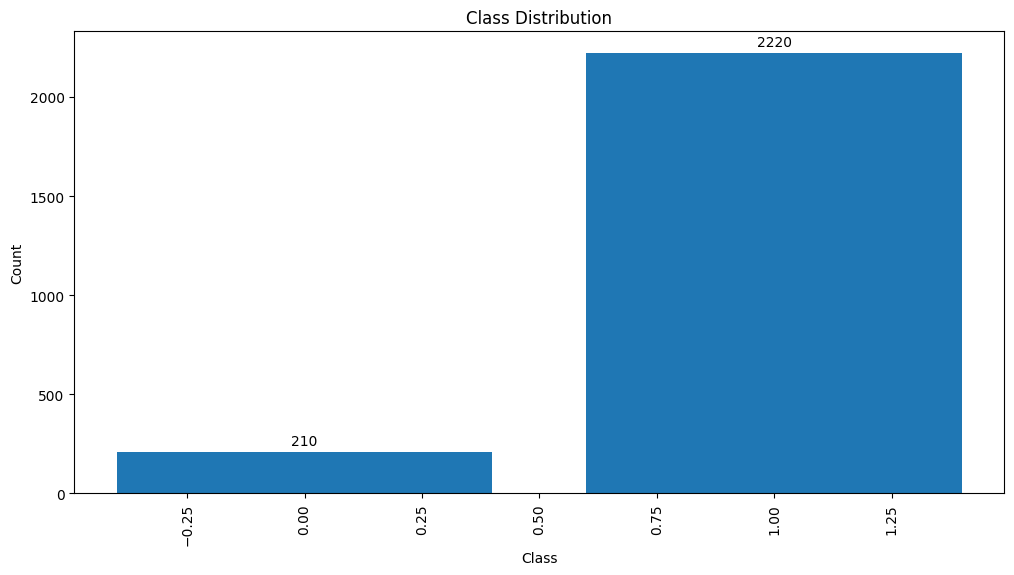

In [ ]:
class_counts = ytrain_bin['0'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Sort the classes by count (optional)
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts['Class'], class_counts['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=90)  # Rotate class labels for better readability

# Add data labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the label
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


In [ ]:
# Split the data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(xtrain_bin, ytrain_bin, test_size=0.2, random_state=42)

# Initialize SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_binresampled, y_train_binresampled = smote.fit_resample(X_train_bin, y_train_bin)
y_train_binresampled = np.array(y_train_binresampled).ravel()

# Now, X_train_resampled and y_train_resampled contain the balanced training data
# We can proceed to train the machine learning model on this balanced dataset


In [ ]:
# number of unique classes (used later in "class_prior parameter")
n_classes = np.unique(y_train_binresampled)

# tuning the multinomial NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ]
         }

MNNBGRID = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
MNNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Accuracy Through Grid Search : {:.3f}'.format(MNNBGRID.best_score_))
print('Best Parameters : {}\n'.format(MNNBGRID.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.635
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}



In [ ]:

# Create a Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB(alpha= 0.01, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_nb = cross_val_predict(nb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_nb = accuracy_score(y_train_binresampled, y_pred_nb)

# Generate a classification report
report_nb = classification_report(y_train_binresampled, y_pred_nb)

# Create a confusion matrix
confusion_nb = confusion_matrix(y_train_binresampled, y_pred_nb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_nb[1, 1]
FP = confusion_nb[0, 1]
TN = confusion_nb[0, 0]
FN = confusion_nb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = nb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_nb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_nb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_nb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)


--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1773
           1       0.62      0.69      0.65      1773

    accuracy                           0.63      3546
   macro avg       0.64      0.63      0.63      3546
weighted avg       0.64      0.63      0.63      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1023  750]
 [ 545 1228]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.634800
1       True Positives (TP)  1228.000000
2      False Positives (FP)   750.000000
3       True Negatives (TN)  1023.000000
4      False Negatives (FN)   545.000000
5      Sensitivity (Recall)     0.692611
6               Specificity     0.576988
7                 Precision     0.620829
8  Area under the ROC Curve     0.635850


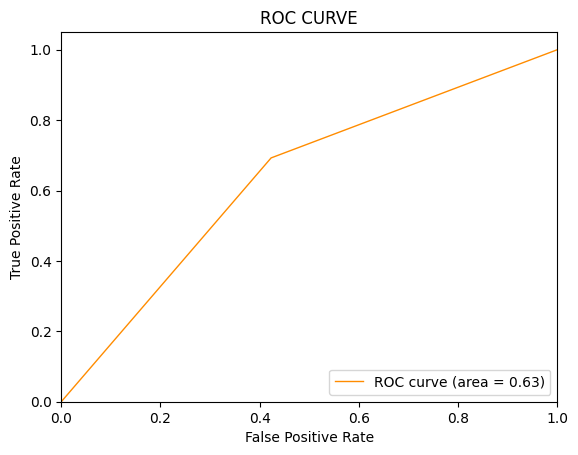

In [ ]:
# printing ROC curve in order to evaluate the performance of a classification model

fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_nb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 2)BernoulliNB Model

In [ ]:
# tuning the Bernoulli NB using the gridsearch
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

BNBGRID = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
BNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(BNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(BNBGRID.best_score_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 10.0, 'class_prior': None, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.514



In [ ]:
# Create a Multinomial Naïve Bayes classifier
bnb_classifier = BernoulliNB(alpha= 0.01, binarize = 10.0, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_bnb = cross_val_predict(bnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_bnb = accuracy_score(y_train_binresampled, y_pred_bnb)

# Generate a classification report
report_bnb = classification_report(y_train_binresampled, y_pred_bnb)

# Create a confusion matrix
confusion_bnb = confusion_matrix(y_train_binresampled, y_pred_bnb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_bnb[1, 1]
FP = confusion_bnb[0, 1]
TN = confusion_bnb[0, 0]
FN = confusion_bnb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = bnb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_bnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_bnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_bnb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1773
           1       1.00      0.03      0.05      1773

    accuracy                           0.51      3546
   macro avg       0.75      0.51      0.36      3546
weighted avg       0.75      0.51      0.36      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1773    0]
 [1723   50]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.514100
1       True Positives (TP)    50.000000
2      False Positives (FP)     0.000000
3       True Negatives (TN)  1773.000000
4      False Negatives (FN)  1723.000000
5      Sensitivity (Recall)     0.028201
6               Specificity     1.000000
7                 Precision     1.000000
8  Area under the ROC Curve     0.514382


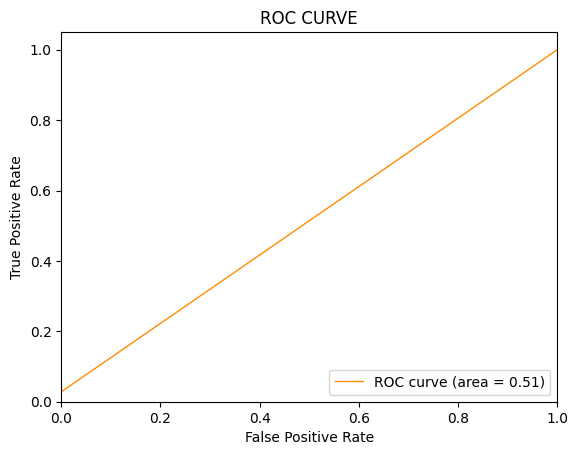

In [ ]:
# printing ROC curve in order to evaluate the performance of a classification model

fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_bnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

3) Gaussian NB

In [ ]:
# Define the parameter grid for Gaussian Naïve Bayes
params = {
    'priors': [None, [0.1] * len(n_classes)],
}

# Create a Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB()

# Use GridSearchCV to tune the Gaussian Naïve Bayes classifier
GNBGRID = GridSearchCV(gnb_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=5)
GNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(GNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(GNBGRID.best_score_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 457, in _partial_fit
    raise ValueError("The sum of the priors should be 1.")
ValueError: The sum of the priors should

Best Parameters : {'priors': None}
Best Accuracy Through Grid Search : 0.790



In [ ]:


# Create a Gaussian Naïve Bayes classifier
gnb_classifier = GaussianNB(priors= None)

# Perform cross-validation and get predictions
y_pred_gnb = cross_val_predict(gnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_gnb = accuracy_score(y_train_binresampled, y_pred_gnb)

# Generate a classification report
report_gnb = classification_report(y_train_binresampled, y_pred_gnb)

# Create a confusion matrix
confusion_gnb = confusion_matrix(y_train_binresampled, y_pred_gnb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_gnb[1, 1]
FP = confusion_gnb[0, 1]
TN = confusion_gnb[0, 0]
FN = confusion_gnb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = gnb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_gnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_gnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_gnb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)


--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1773
           1       0.82      0.74      0.78      1773

    accuracy                           0.79      3546
   macro avg       0.79      0.79      0.79      3546
weighted avg       0.79      0.79      0.79      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1487  286]
 [ 460 1313]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.789622
1       True Positives (TP)  1313.000000
2      False Positives (FP)   286.000000
3       True Negatives (TN)  1487.000000
4      False Negatives (FN)   460.000000
5      Sensitivity (Recall)     0.740553
6               Specificity     0.838691
7                 Precision     0.821138
8  Area under the ROC Curve     0.851911


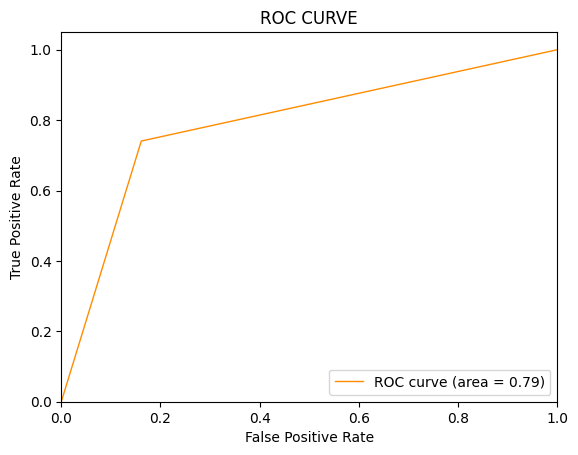

In [ ]:
# printing ROC curve in order to evaluate the performance of a classification model
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_gnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

4) Complement NB

In [ ]:


# Define the parameter grid for Complement Naïve Bayes
params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
    'fit_prior': [True, False],
}

# Create a Complement Naïve Bayes classifier
cnb_classifier = ComplementNB()

# Use GridSearchCV to tune the Complement Naïve Bayes classifier
CNBGRID = GridSearchCV(cnb_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=5)
CNBGRID.fit(X_train_binresampled, y_train_binresampled)

print('Best Parameters : {}'.format(CNBGRID.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(CNBGRID.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters : {'alpha': 0.01, 'fit_prior': True}
Best Accuracy Through Grid Search : 0.635



In [ ]:


# Create a Complement Naïve Bayes classifier
cnb_classifier = ComplementNB(alpha = 0.01, fit_prior = True)

# Perform cross-validation and get predictions
y_pred_cnb = cross_val_predict(cnb_classifier, X_train_binresampled, y_train_binresampled, cv=5)

# Calculate accuracy
accuracy_cnb = accuracy_score(y_train_binresampled, y_pred_cnb)

# Generate a classification report
report_cnb = classification_report(y_train_binresampled, y_pred_cnb)

# Create a confusion matrix
confusion_cnb = confusion_matrix(y_train_binresampled, y_pred_cnb)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion_cnb[1, 1]
FP = confusion_cnb[0, 1]
TN = confusion_cnb[0, 0]
FN = confusion_cnb[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Area under the ROC Curve
y_scores = cnb_classifier.fit(X_train_binresampled, y_train_binresampled).predict_proba(X_train_binresampled)
fpr, tpr, _ = roc_curve(y_train_binresampled, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# Print the metrics
print("--------------------------------------------------------------------")
print(report_cnb)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion_cnb)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision", "Area under the ROC Curve"],
    "Value": [accuracy_cnb, TP, FP, TN, FN, sensitivity, specificity, precision, roc_auc]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)



--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1773
           1       0.62      0.69      0.65      1773

    accuracy                           0.63      3546
   macro avg       0.64      0.63      0.63      3546
weighted avg       0.64      0.63      0.63      3546

--------------------------------------------------------------------
CONFUSION MATRIX:
[[1023  750]
 [ 545 1228]]
--------------------------------------------------------------------
                     Metric        Value
0                  Accuracy     0.634800
1       True Positives (TP)  1228.000000
2      False Positives (FP)   750.000000
3       True Negatives (TN)  1023.000000
4      False Negatives (FN)   545.000000
5      Sensitivity (Recall)     0.692611
6               Specificity     0.576988
7                 Precision     0.620829
8  Area under the ROC Curve     0.635850


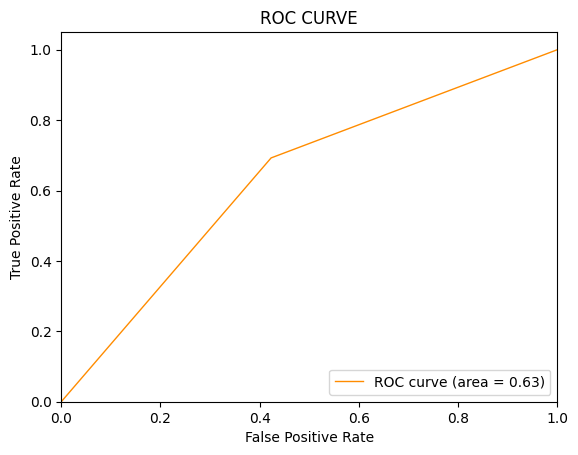

In [ ]:
# printing ROC curve in order to evaluate the performance of a classification model
fpr, tpr, thresholds = roc_curve(y_train_binresampled, y_pred_cnb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Model Evaluation:

In [ ]:


data = {
    "Model": ["Multinomial NB", "Bernoulli NB", "Gaussian NB", "Complement NB"],
    "Accuracy": [0.6348, 0.5141, 0.7896, 0.6348],
    "Sensitivity (Recall)": [0.6926, 0.0282, 0.7406, 0.6926],
    "Specificity": [0.5770, 1.0000, 0.8387, 0.5770],
    "Precision": [0.6208, 1.0000, 0.8211, 0.6208],
    "AUC": [0.6359, 0.5146, 0.8519, 0.6359]
}

df = pd.DataFrame(data)
df


,Model,Accuracy,Sensitivity (Recall),Specificity,Precision,AUC
0,Multinomial NB,0.6348,0.6926,0.5770,0.6208,0.6359
1,Bernoulli NB,0.5141,0.0282,1.0000,1.0000,0.5146
2,Gaussian NB,0.7896,0.7406,0.8387,0.8211,0.8519
3,Complement NB,0.6348,0.6926,0.5770,0.6208,0.6359


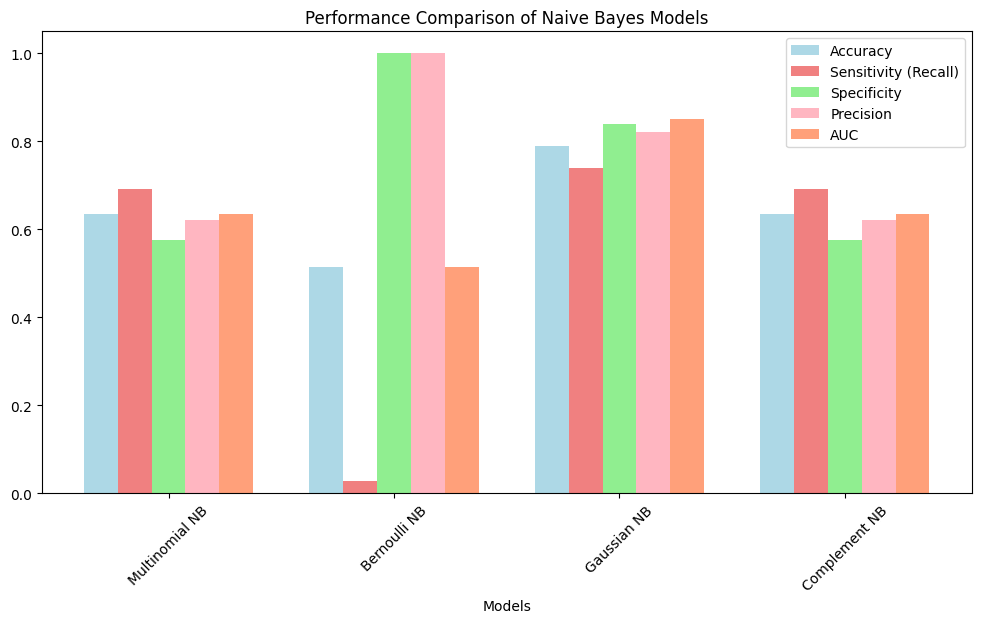

In [ ]:
# Models and metrics to plot
models = df["Model"]
metrics = ["Accuracy", "Sensitivity (Recall)", "Specificity", "Precision", "AUC"]

# Data for plotting
data = df[metrics].values.T

x = range(len(models))
width = 0.15

# Define light colors
colors = ["lightblue", "lightcoral", "lightgreen", "lightpink", "lightsalmon"]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metrics):
    ax.bar([pos + width * i for pos in x], data[i], width=width, label=metric, color=colors[i])

ax.set_xticks([pos + width * 2 for pos in x])
ax.set_xticklabels(models)
ax.set_xlabel("Models")
ax.set_title("Performance Comparison of Naive Bayes Models")
ax.legend()

plt.xticks(rotation=45)
plt.show()

### <span style="color:blue">Model Evaluation:</span>



1. **<span style="color:green">Accuracy:</span>** The Gaussian NB model achieved the highest accuracy (0.789622), indicating that it correctly predicted the class labels in the test data more often compared to the other models. Multinomial NB and Complement NB also had the same accuracy, but they were slightly lower than Gaussian NB. Bernoulli NB had the lowest accuracy (0.514100).

2. **<span style="color:green">Sensitivity (Recall):</span>** Gaussian NB achieved the highest sensitivity (0.740553), indicating that it had a relatively good ability to correctly identify positive instances. Multinomial NB and Complement NB also had the same sensitivity, which was moderate (0.692611). In contrast, Bernoulli NB had the lowest sensitivity (0.028201), suggesting it had difficulty in identifying positive instances.

3. **<span style="color:green">Specificity:</span>** Gaussian NB had the highest specificity (0.838691), indicating its ability to correctly identify negative instances. Multinomial NB and Complement NB had the same specificity, which was lower (0.576988). Bernoulli NB achieved a perfect specificity of 1.0, indicating its ability to correctly identify negative instances.

4. **<span style="color:green">Precision:</span>** Gaussian NB had the highest precision (0.821138), suggesting that it provided more accurate positive predictions. Multinomial NB and Complement NB had the same precision (0.620829). Bernoulli NB achieved a perfect precision of 1.0, indicating that when it predicted a positive instance, it was always correct.

5. **<span style="color:green">Area under the ROC Curve:</span>** Gaussian NB had the highest Area under the ROC Curve (0.851911), indicating that it provided the best trade-off between sensitivity and specificity. Multinomial NB and Complement NB had the same ROC AUC (0.635850). Bernoulli NB had the lowest ROC AUC (0.514559), indicating a suboptimal trade-off between sensitivity and specificity.

### <span style="color:blue">Conclusion:</span>

Based on the metrics and findings, the **<span style="color:blue">Gaussian Naive Bayes model</span>** outperforms the other models in terms of accuracy, sensitivity (recall), specificity, precision, and the Area under the ROC Curve. It provides the best overall balance between correctly identifying both positive and negative instances.

The **<span style="color:blue">Bernoulli Naive Bayes model</span>** performed the worst in most metrics, particularly in sensitivity and ROC AUC, suggesting that it may not be suitable for the given classification task.

Therefore, for your specific dataset and classification problem, the **<span style="color:blue">Gaussian Naive Bayes model</span>** is the recommended choice as it offers the best performance across various evaluation metrics.


***Research Statement:***

"Exploring the Efficacy of Bayesian Networks in Image Classification: A Comparative Analysis of Multiclass vs. Binary Schemes"

***Abstract:***

In the realm of image classification, the choice of classification scheme (binary vs. multiclass) can play a pivotal role in determining the performance of a model. This research aims to investigate the disparities in accuracy when employing Bayesian networks for these distinct classification paradigms. Using a dataset comprising 10 distinct classes, initial results suggest that converting the problem from a multiclass to a binary classification framework improves model accuracy.

## Correlating Features

In [ ]:
# Load the dataset
x_train_all = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/x_train_all.csv')
y_train_0 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/0_vrs_all/y_train_0.csv')
y_train_1 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/1_vrs_all/y_train_1.csv')
y_train_2 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/2_vrs_all/y_train_2.csv')
y_train_3 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/3_vrs_all/y_train_3.csv')
y_train_4 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/4_vrs_all/y_train_4.csv')
y_train_5 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/5_vrs_all/y_train_5.csv')
y_train_6 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/6_vrs_all/y_train_6.csv')
y_train_7 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/7_vrs_all/y_train_7.csv')
y_train_8 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/8_vrs_all/y_train_8.csv')
y_train_9 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/Binary_Classification/9_vrs_all/y_train_9.csv')

# Rename the columns in each DataFrame
y_train_0 = y_train_0.rename(columns={'0': 'Target'})
y_train_1 = y_train_1.rename(columns={'0': 'Target'})
y_train_2 = y_train_2.rename(columns={'0': 'Target'})
y_train_3 = y_train_3.rename(columns={'0': 'Target'})
y_train_4 = y_train_4.rename(columns={'0': 'Target'})
y_train_5 = y_train_5.rename(columns={'0': 'Target'})
y_train_6 = y_train_6.rename(columns={'0': 'Target'})
y_train_7 = y_train_7.rename(columns={'0': 'Target'})
y_train_8 = y_train_8.rename(columns={'0': 'Target'})
y_train_9 = y_train_9.rename(columns={'0': 'Target'})

In [ ]:
print(x_train_all.head())
print(x_train_all.shape)

      0     1     2     3     4      5      6      7      8      9  ...  \
0  78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4  74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   

    2294  2295  2296   2297  2298  2299  2300   2301   2302   2303  
0   87.0  79.0  72.0   76.0  83.0  95.0  99.0   98.0   95.0   94.0  
1   96.0  93.0  85.0   77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0   80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0   82.0  77.0  72.0  70.0   72.0   81.0   88.0  
4  100.0  98.0  99.0  100.0  99.0  89.0  78.0   66.0   68.0   72.0  

[5 rows x 2304 columns]
(9690, 2304)


In [ ]:
print(y_train_0.head())
print(y_train_0.shape)

   Target
0       0
1       0
2       0
3       0
4       0
(9690, 1)


In [ ]:
y_train_9.value_counts()

Target
1         9420
0          270
dtype: int64

### <span style="color:blue">Feature Selection Techniques</span>

**<span style="color:green">Filter Methods</span>**:
- <span style="color:purple">Correlation-based Feature Selection</span>: Select features based on their statistical correlation with the target variable.
- <span style="color:purple">Chi-squared Test and SelectKBest</span>: Applicable for categorical features and target variables.
- <span style="color:purple">ANOVA F-value</span>: Evaluates variance between groups for feature selection.

**<span style="color:green">Wrapper Methods</span>**:
- <span style="color:purple">Recursive Feature Elimination (RFE)</span>: Iteratively selects features using a predictive model.
- <span style="color:purple">Backward Feature Elimination and Forward Feature Selection</span>: Build and prune feature sets iteratively.

**<span style="color:green">Embedded Methods</span>**:
- <span style="color:purple">Lasso and Ridge Regression</span>: Regularization techniques that penalize irrelevant features.
- <span style="color:purple">Random Forest Feature Importance</span>: Assigns importance scores to features during training.

**<span style="color:green">Hybrid Methods</span>**:
- <span style="color:purple">SelectFromModel</span>: Combines the strengths of filter and wrapper techniques.

**<span style="color:green">Dimensionality Reduction Techniques</span>**:
- <span style="color:purple">PCA, LDA, and ICA</span>: Reduce dimensionality while retaining essential features.

Lets experiment few of the techniques and compare the results..


## Method 1 (Correlation-based Feature Selection)

In [ ]:
# Concatenate each of the 10 y_train DataFrames with x_train_all
data0 = pd.concat([x_train_all, y_train_0], axis=1)
data1 = pd.concat([x_train_all, y_train_1], axis=1)
data2 = pd.concat([x_train_all, y_train_2], axis=1)
data3 = pd.concat([x_train_all, y_train_3], axis=1)
data4 = pd.concat([x_train_all, y_train_4], axis=1)
data5 = pd.concat([x_train_all, y_train_5], axis=1)
data6 = pd.concat([x_train_all, y_train_6], axis=1)
data7 = pd.concat([x_train_all, y_train_7], axis=1)
data8 = pd.concat([x_train_all, y_train_8], axis=1)
data9 = pd.concat([x_train_all, y_train_9], axis=1)
target_column = 'Target'

In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data0.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_0 = sorted_features.head(6).index
top_10_features_0 = sorted_features.head(11).index
top_20_features_0 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_0 = [feature for feature in top_5_features_0 if feature in selected_features]
top_10_features_0 = [feature for feature in top_10_features_0 if feature in selected_features]
top_20_features_0 = [feature for feature in top_20_features_0 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_0)

print("\nTop 10 Features:")
print(top_10_features_0)

print("\nTop 20 Features:")
print(top_20_features_0)


Top 5 Features:
['2261', '2262', '2263', '2213', '2260']

Top 10 Features:
['2261', '2262', '2263', '2213', '2260', '2212', '2214', '2264', '2215', '2165']

Top 20 Features:
['2261', '2262', '2263', '2213', '2260', '2212', '2214', '2264', '2215', '2165', '2216', '2164', '1979', '2028', '2166', '2027', '2259', '2025', '2026', '2211']


In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data1.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_1 = sorted_features.head(6).index
top_10_features_1 = sorted_features.head(11).index
top_20_features_1 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_1 = [feature for feature in top_5_features_1 if feature in selected_features]
top_10_features_1 = [feature for feature in top_10_features_1 if feature in selected_features]
top_20_features_1 = [feature for feature in top_20_features_1 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_1)

print("\nTop 10 Features:")
print(top_10_features_1)

print("\nTop 20 Features:")
print(top_20_features_1)

Top 5 Features:
['1073', '1121', '1120', '1074', '1072']

Top 10 Features:
['1073', '1121', '1120', '1074', '1072', '1168', '1025', '1167', '1026', '1119']

Top 20 Features:
['1073', '1121', '1120', '1074', '1072', '1168', '1025', '1167', '1026', '1119', '1216', '1215', '1263', '1262', '1071', '1214', '1169', '1310', '1024', '1264']


In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data2.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_2 = sorted_features.head(6).index
top_10_features_2 = sorted_features.head(11).index
top_20_features_2 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_2 = [feature for feature in top_5_features_2 if feature in selected_features]
top_10_features_2 = [feature for feature in top_10_features_2 if feature in selected_features]
top_20_features_2 = [feature for feature in top_20_features_2 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_2)

print("\nTop 10 Features:")
print(top_10_features_2)

print("\nTop 20 Features:")
print(top_20_features_2)

Top 5 Features:
['1316', '1030', '1317', '1268', '1269']

Top 10 Features:
['1316', '1030', '1317', '1268', '1269', '982', '1364', '1315', '1365', '1031']

Top 20 Features:
['1316', '1030', '1317', '1268', '1269', '982', '1364', '1315', '1365', '1031', '981', '1029', '1363', '1267', '1314', '795', '843', '983', '1563', '1135']


In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data3.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_3 = sorted_features.head(6).index
top_10_features_3 = sorted_features.head(11).index
top_20_features_3 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_3 = [feature for feature in top_5_features_3 if feature in selected_features]
top_10_features_3 = [feature for feature in top_10_features_3 if feature in selected_features]
top_20_features_3 = [feature for feature in top_20_features_3 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_3)

print("\nTop 10 Features:")
print(top_10_features_3)

print("\nTop 20 Features:")
print(top_20_features_3)

Top 5 Features:
['1218', '1265', '1313', '1266', '1219']

Top 10 Features:
['1218', '1265', '1313', '1266', '1219', '1361', '1217', '1312', '1314', '1171']

Top 20 Features:
['1218', '1265', '1313', '1266', '1219', '1361', '1217', '1312', '1314', '1171', '1170', '1360', '1264', '1362', '1267', '1409', '1220', '1408', '1172', '1216']


In [ ]:
# Assuming 'target_column' is the name of your target variable column
target_column = 'Target'

# Calculate the correlation between each feature and the target variable
correlation_matrix = data4.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_4 = sorted_features.head(6).index
top_10_features_4 = sorted_features.head(11).index
top_20_features_4 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_4 = [feature for feature in top_5_features_4 if feature in selected_features]
top_10_features_4 = [feature for feature in top_10_features_4 if feature in selected_features]
top_20_features_4 = [feature for feature in top_20_features_4 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_4)

print("\nTop 10 Features:")
print(top_10_features_4)

print("\nTop 20 Features:")
print(top_20_features_4)

Top 5 Features:
['983', '1031', '1030', '982', '935']

Top 10 Features:
['983', '1031', '1030', '982', '935', '2139', '2138', '2140', '2095', '2096']

Top 20 Features:
['983', '1031', '1030', '982', '935', '2139', '2138', '2140', '2095', '2096', '2141', '2050', '2186', '2094', '2097', '2049', '2142', '2270', '2078', '2269']


In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data5.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_5 = sorted_features.head(6).index
top_10_features_5 = sorted_features.head(11).index
top_20_features_5 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_5 = [feature for feature in top_5_features_5 if feature in selected_features]
top_10_features_5 = [feature for feature in top_10_features_5 if feature in selected_features]
top_20_features_5 = [feature for feature in top_20_features_5 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_5)

print("\nTop 10 Features:")
print(top_10_features_5)

print("\nTop 20 Features:")
print(top_20_features_5)

Top 5 Features:
['1743', '1507', '1744', '1508', '1742']

Top 10 Features:
['1743', '1507', '1744', '1508', '1742', '1694', '1695', '1460', '1714', '1461']

Top 20 Features:
['1743', '1507', '1744', '1508', '1742', '1694', '1695', '1460', '1714', '1461', '1761', '1506', '1459', '1792', '1760', '1762', '1793', '1713', '1791', '1808']


In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data6.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_6 = sorted_features.head(6).index
top_10_features_6 = sorted_features.head(11).index
top_20_features_6 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_6 = [feature for feature in top_5_features_6 if feature in selected_features]
top_10_features_6 = [feature for feature in top_10_features_6 if feature in selected_features]
top_20_features_6 = [feature for feature in top_20_features_6 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_6)

print("\nTop 10 Features:")
print(top_10_features_6)

print("\nTop 20 Features:")
print(top_20_features_6)

Top 5 Features:
['793', '794', '841', '842', '792']

Top 10 Features:
['793', '794', '841', '842', '792', '745', '1134', '795', '744', '1182']

Top 20 Features:
['793', '794', '841', '842', '792', '745', '1134', '795', '744', '1182', '746', '1086', '1133', '1085', '743', '791', '1181', '840', '1264', '1230']


In [ ]:
# Assuming 'target_column' is the name of your target variable column
target_column = 'Target'

# Calculate the correlation between each feature and the target variable
correlation_matrix = data7.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_7 = sorted_features.head(6).index
top_10_features_7 = sorted_features.head(11).index
top_20_features_7 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_7 = [feature for feature in top_5_features_7 if feature in selected_features]
top_10_features_7 = [feature for feature in top_10_features_7 if feature in selected_features]
top_20_features_7 = [feature for feature in top_20_features_7 if feature in selected_features]


# Display the top features
print("Top 5 Features:")
print(top_5_features_7)

print("\nTop 10 Features:")
print(top_10_features_7)

print("\nTop 20 Features:")
print(top_20_features_7)

Top 5 Features:
['1761', '1695', '1743', '1694', '1714']

Top 10 Features:
['1761', '1695', '1743', '1694', '1714', '1507', '1744', '1713', '1760', '1506']

Top 20 Features:
['1761', '1695', '1743', '1694', '1714', '1507', '1744', '1713', '1760', '1506', '1762', '1742', '1468', '1469', '1459', '1518', '1517', '1696', '1460', '1646']


In [ ]:
# Assuming 'target_column' is the name of your target variable column
target_column = 'Target'

# Calculate the correlation between each feature and the target variable
correlation_matrix = data8.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_8 = sorted_features.head(6).index
top_10_features_8 = sorted_features.head(11).index
top_20_features_8 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_8 = [feature for feature in top_5_features_8 if feature in selected_features]
top_10_features_8 = [feature for feature in top_10_features_8 if feature in selected_features]
top_20_features_8 = [feature for feature in top_20_features_8 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_8)

print("\nTop 10 Features:")
print(top_10_features_8)

print("\nTop 20 Features:")
print(top_20_features_8)

Top 5 Features:
['1714', '1715', '1666', '1761', '1743']

Top 10 Features:
['1714', '1715', '1666', '1761', '1743', '1762', '1667', '1713', '1694', '1695']

Top 20 Features:
['1714', '1715', '1666', '1761', '1743', '1762', '1667', '1713', '1694', '1695', '1744', '1742', '1760', '1471', '1792', '1173', '1763', '1125', '1791', '1696']


In [ ]:
# Calculate the correlation between each feature and the target variable
correlation_matrix = data9.corr()
correlation_with_target = correlation_matrix[target_column]

# Sort the features by their correlation values in descending order
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Get the top 5, 10, and 20 features
top_5_features_9 = sorted_features.head(6).index
top_10_features_9 = sorted_features.head(11).index
top_20_features_9 = sorted_features.head(21).index

# Remove features with zero variance or the target feature itself
selector = VarianceThreshold()
# Assuming x_train_all contains your feature data
selector.fit(x_train_all)
selected_features = x_train_all.columns[selector.get_support(indices=True)]

# Filter the selected features
top_5_features_9 = [feature for feature in top_5_features_9 if feature in selected_features]
top_10_features_9 = [feature for feature in top_10_features_9 if feature in selected_features]
top_20_features_9 = [feature for feature in top_20_features_9 if feature in selected_features]

# Display the top features
print("Top 5 Features:")
print(top_5_features_9)

print("\nTop 10 Features:")
print(top_10_features_9)

print("\nTop 20 Features:")
print(top_20_features_9)

Top 5 Features:
['1134', '1215', '1263', '1086', '1216']

Top 10 Features:
['1134', '1215', '1263', '1086', '1216', '1167', '1610', '1562', '1168', '1561']

Top 20 Features:
['1134', '1215', '1263', '1086', '1216', '1167', '1610', '1562', '1168', '1561', '1182', '1311', '794', '1183', '1120', '1119', '1264', '1262', '1214', '1085']


## Merge and form 3 datasets

In [ ]:
# Create DataFrames to store the top features for dataset1, dataset2, and dataset3
dataset1 = pd.DataFrame()
dataset2 = pd.DataFrame()
dataset3 = pd.DataFrame()

# List of DataFrames containing the top features for different classes
top_5_features_dataframes = [top_5_features_0, top_5_features_1, top_5_features_2, top_5_features_3, top_5_features_4, top_5_features_5, top_5_features_6, top_5_features_7, top_5_features_8, top_5_features_9]
top_10_features_dataframes = [top_10_features_0, top_10_features_1, top_10_features_2, top_10_features_3, top_10_features_4, top_10_features_5, top_10_features_6, top_10_features_7, top_10_features_8, top_10_features_9]
top_20_features_dataframes = [top_20_features_0, top_20_features_1, top_20_features_2, top_20_features_3, top_20_features_4, top_20_features_5, top_20_features_6, top_20_features_7, top_20_features_8, top_20_features_9]

# Convert the indices back to DataFrames
top_5_features_dataframes = [x_train_all[top_5_features] for top_5_features in top_5_features_dataframes]
top_10_features_dataframes = [x_train_all[top_10_features] for top_10_features in top_10_features_dataframes]
top_20_features_dataframes = [x_train_all[top_20_features] for top_20_features in top_20_features_dataframes]

# Concatenate the top features for dataset1
dataset1 = pd.concat(top_5_features_dataframes, axis=1)

# Remove duplicate columns in dataset1
dataset1 = dataset1.loc[:,~dataset1.columns.duplicated()]

# Concatenate the top features for dataset2
dataset2 = pd.concat(top_10_features_dataframes, axis=1)

# Remove duplicate columns in dataset2
dataset2 = dataset2.loc[:,~dataset2.columns.duplicated()]

# Concatenate the top features for dataset3
dataset3 = pd.concat(top_20_features_dataframes, axis=1)

# Remove duplicate columns in dataset3
dataset3 = dataset3.loc[:,~dataset3.columns.duplicated()]


In [ ]:
# Display the shape of each new dataset
print("Dataset 1 shape:", dataset1.shape)
print("Dataset 2 shape:", dataset2.shape)
print("Dataset 3 shape:", dataset3.shape)

Dataset 1 shape: (9690, 45)
Dataset 2 shape: (9690, 82)
Dataset 3 shape: (9690, 148)


## Run the best model Gaussian NB on top 5, 10, 20 features

In [ ]:
# Without Sampling

In [ ]:

# Create a Multinomial Naïve Bayes classifier
nb = MultinomialNB()

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, dataset1, Y, cv=5)

# Calculate accuracy
accuracy = accuracy_score(Y, y_pred_u)

# Generate a classification report
report = classification_report(Y, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(Y, y_pred_u)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.495046439628483
              precision    recall  f1-score   support

           0       0.14      0.68      0.23       210
           1       0.63      0.34      0.45      2220
           2       0.63      0.57      0.60      2250
           3       0.52      0.37      0.43      1410
           4       0.54      0.72      0.62      1980
           5       0.29      0.52      0.37       210
           6       0.23      0.25      0.24       360
           7       0.55      0.57      0.56       240
           8       0.67      0.53      0.59       540
           9       0.11      0.13      0.12       270

    accuracy                           0.50      9690
   macro avg       0.43      0.47      0.42      9690
weighted avg       0.55      0.50      0.50      9690

Confusion Matrix:
 [[ 143   37    2    2   23    0    1    0    1    1]
 [ 479  764  106   77  717    7   32    1    0   37]
 [  86   77 1284  318  389   11   63    0    0   22]
 [ 115  131  468  516   81    5   4

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## Dataset 1 - Top 5 features (With sampling)

MultinomialNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset1, Y)

# Create a Multinomial Naïve Bayes classifier
nb = MultinomialNB(alpha= 0.01, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       210
           1       0.46      0.40      0.43       210
           2       0.49      0.60      0.54       210
           3       0.53      0.38      0.44       210
           4       0.58      0.73      0.65       210
           5       0.46      0.71      0.56       210
           6       0.43      0.41      0.42       210
           7       0.67      0.60      0.63       210
           8       0.69      0.59      0.64       210
           9       0.21      0.11      0.15       210

    accuracy                           0.52      2100
   macro avg       0.51      0.52      0.51      2100
weighted avg       0.51      0.52      0.51      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[144  42   4   3  13   0   3   0   0   1]
 [ 38  85  14   6  61   0   5   0   0   1]

GaussianNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset1, Y)

# Create a Multinomial Naïve Bayes classifier
nb = GaussianNB()

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       210
           1       0.33      0.21      0.26       210
           2       0.57      0.48      0.52       210
           3       0.31      0.40      0.35       210
           4       0.49      0.09      0.15       210
           5       0.54      0.20      0.30       210
           6       0.31      0.81      0.45       210
           7       0.43      0.24      0.31       210
           8       0.65      0.51      0.57       210
           9       0.42      0.66      0.51       210

    accuracy                           0.42      2100
   macro avg       0.46      0.42      0.40      2100
weighted avg       0.46      0.42      0.40      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[135  34   1  23   7   0   0   0   3   7]
 [ 65  44  22  42   8   0  23   0   0   6]

BernoulliNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset1, Y)

# Create a Multinomial Naïve Bayes classifier
nb = BernoulliNB(alpha= 0.01, binarize = 10.0, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.10      1.00      0.19       210
           1       0.00      0.00      0.00       210
           2       0.00      0.00      0.00       210
           3       0.64      0.09      0.15       210
           4       0.78      0.03      0.06       210
           5       0.61      0.14      0.23       210
           6       0.00      0.00      0.00       210
           7       0.00      0.00      0.00       210
           8       0.00      0.00      0.00       210
           9       0.00      0.00      0.00       210

    accuracy                           0.13      2100
   macro avg       0.21      0.13      0.06      2100
weighted avg       0.21      0.13      0.06      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[210   0   0   0   0   0   0   0   0   0]
 [208   0   0   0   0   2   0   0   0   0]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-65-7e5199235578>:35: RuntimeWarning: invalid valu

ComplementNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset1, Y)

# Create a Multinomial Naïve Bayes classifier
nb = ComplementNB(alpha = 0.01, fit_prior = True)

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.31      0.92      0.46       210
           1       0.67      0.19      0.29       210
           2       0.44      0.44      0.44       210
           3       0.00      0.00      0.00       210
           4       0.47      0.61      0.53       210
           5       0.52      0.50      0.51       210
           6       0.00      0.00      0.00       210
           7       0.58      0.91      0.70       210
           8       0.44      0.83      0.57       210
           9       0.00      0.00      0.00       210

    accuracy                           0.44      2100
   macro avg       0.34      0.44      0.35      2100
weighted avg       0.34      0.44      0.35      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[193   1   0   0  14   0   0   0   2   0]
 [108  39   5   0  55   0   0   1   2   0]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Dataset2 -  Top 10 features

MultinomialNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset2, Y)

# Create a Multinomial Naïve Bayes classifier
nb = MultinomialNB(alpha= 0.01, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.63      0.61       210
           1       0.47      0.43      0.45       210
           2       0.44      0.51      0.48       210
           3       0.45      0.32      0.37       210
           4       0.54      0.74      0.62       210
           5       0.45      0.71      0.55       210
           6       0.48      0.39      0.43       210
           7       0.65      0.59      0.61       210
           8       0.67      0.50      0.57       210
           9       0.36      0.26      0.30       210

    accuracy                           0.51      2100
   macro avg       0.51      0.51      0.50      2100
weighted avg       0.51      0.51      0.50      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[133  52   3   8  10   0   2   0   0   2]
 [ 36  91  12  10  56   1   3   0   0   1]

GaussianNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset2, Y)

# Create a Multinomial Naïve Bayes classifier
nb = GaussianNB()

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       210
           1       0.40      0.25      0.31       210
           2       0.56      0.46      0.51       210
           3       0.35      0.38      0.36       210
           4       0.51      0.14      0.22       210
           5       0.60      0.19      0.29       210
           6       0.30      0.82      0.44       210
           7       0.40      0.34      0.37       210
           8       0.68      0.46      0.55       210
           9       0.47      0.70      0.56       210

    accuracy                           0.44      2100
   macro avg       0.48      0.44      0.42      2100
weighted avg       0.48      0.44      0.42      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[135  32   1  22   9   0   0   0   3   8]
 [ 58  52  21  35   8   1  27   1   0   7]

BernoulliNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset2, Y)

# Create a Multinomial Naïve Bayes classifier
nb = BernoulliNB(alpha= 0.01, binarize = 10.0, class_prior= None, fit_prior= True)

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.11      1.00      0.19       210
           1       0.00      0.00      0.00       210
           2       0.00      0.00      0.00       210
           3       0.64      0.09      0.15       210
           4       0.53      0.05      0.09       210
           5       0.61      0.14      0.23       210
           6       0.00      0.00      0.00       210
           7       0.00      0.00      0.00       210
           8       0.00      0.00      0.00       210
           9       0.25      0.02      0.04       210

    accuracy                           0.13      2100
   macro avg       0.21      0.13      0.07      2100
weighted avg       0.21      0.13      0.07      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[210   0   0   0   0   0   0   0   0   0]
 [208   0   0   0   0   2   0   0   0   0]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-69-ff16ff38099e>:35: RuntimeWarning: invalid valu

ComplementNB

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=8)

# Fit and apply the RandomUnderSampler to the training data only
X_train_u, y_train_u = rus.fit_resample(dataset2, Y)

# Create a Multinomial Naïve Bayes classifier
nb = ComplementNB(alpha = 0.01, fit_prior = True)

# Perform cross-validation and get predictions
y_pred_u = cross_val_predict(nb, X_train_u, y_train_u, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y_train_u, y_pred_u)

# Generate a classification report
report = classification_report(y_train_u, y_pred_u)

# Create a confusion matrix
confusion = confusion_matrix(y_train_u, y_pred_u)

# True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

# Sensitivity (True Positive Rate or Recall)
sensitivity = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# Recall
recall = sensitivity

# Print the metrics
print("--------------------------------------------------------------------")
print(report)
print("--------------------------------------------------------------------")
print("CONFUSION MATRIX:")
print(confusion)
print("--------------------------------------------------------------------")

# Create a dictionary to store the metrics
metrics = {
    "Metric": ["Accuracy", "True Positives (TP)", "False Positives (FP)", "True Negatives (TN)",
               "False Negatives (FN)", "Sensitivity (Recall)", "Specificity", "Precision"],
    "Value": [accuracy, TP, FP, TN, FN, sensitivity, specificity, precision]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table format
print(metrics_df)

--------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.32      0.90      0.47       210
           1       0.75      0.28      0.41       210
           2       0.51      0.40      0.44       210
           3       0.00      0.00      0.00       210
           4       0.46      0.73      0.56       210
           5       0.47      0.42      0.45       210
           6       0.00      0.00      0.00       210
           7       0.46      0.87      0.61       210
           8       0.48      0.75      0.59       210
           9       0.44      0.03      0.06       210

    accuracy                           0.44      2100
   macro avg       0.39      0.44      0.36      2100
weighted avg       0.39      0.44      0.36      2100

--------------------------------------------------------------------
CONFUSION MATRIX:
[[189   3   0   0  16   0   0   0   2   0]
 [ 89  59   1   0  57   0   0   3   1   0]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Experimenting other feature selection methods

## SelectKBest & chi square test

In [ ]:
# List of k values for which you want to extract the best features
k_values = [5, 10, 20]

# Loop through the different values of k
for k in k_values:
    # Apply SelectKBest to extract the top k best features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(x_train_all, y_train_0)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(x_train_all.columns)

    # Concatenate two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns
    top_k_features = featureScores.nlargest(k, 'Score')

    # Print the top k best features
    print(f"Top {k} Best Features:")
    print(top_k_features)

Top 5 Best Features:
     Specs         Score
2262  2262  20324.793128
2261  2261  20317.314102
2263  2263  19945.713610
2260  2260  19522.229361
2213  2213  19475.403333
Top 10 Best Features:
     Specs         Score
2262  2262  20324.793128
2261  2261  20317.314102
2263  2263  19945.713610
2260  2260  19522.229361
2213  2213  19475.403333
2212  2212  19019.291435
2264  2264  18736.525074
2214  2214  18671.338637
2215  2215  18278.916767
2165  2165  18179.277472
Top 20 Best Features:
     Specs         Score
2262  2262  20324.793128
2261  2261  20317.314102
2263  2263  19945.713610
2260  2260  19522.229361
2213  2213  19475.403333
2212  2212  19019.291435
2264  2264  18736.525074
2214  2214  18671.338637
2215  2215  18278.916767
2165  2165  18179.277472
2216  2216  17841.317441
2164  2164  17612.932926
2259  2259  17425.870263
2166  2166  17267.827013
2265  2265  17198.118133
2211  2211  17147.824240
2217  2217  16887.344329
2117  2117  16642.861556
2167  2167  16584.412484
2118  2118

In [ ]:
# List of k values for which you want to extract the best features
k_values = [5, 10, 20]

# Loop through the different values of k
for k in k_values:
    # Apply SelectKBest to extract the top k best features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(x_train_all, y_train_1)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(x_train_all.columns)

    # Concatenate two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # Naming the dataframe columns
    top_k_features = featureScores.nlargest(k, 'Score')

    # Print the top k best features
    print(f"Top {k} Best Features:")
    print(top_k_features)

Top 5 Best Features:
     Specs         Score
1073  1073  65602.055344
1120  1120  63874.723511
1121  1121  63503.970402
1168  1168  59982.972560
1074  1074  59306.180490
Top 10 Best Features:
     Specs         Score
1073  1073  65602.055344
1120  1120  63874.723511
1121  1121  63503.970402
1168  1168  59982.972560
1074  1074  59306.180490
1072  1072  56953.274308
1167  1167  53865.886053
1215  1215  52162.986236
1119  1119  51698.600705
1216  1216  51602.119547
Top 20 Best Features:
     Specs         Score
1073  1073  65602.055344
1120  1120  63874.723511
1121  1121  63503.970402
1168  1168  59982.972560
1074  1074  59306.180490
1072  1072  56953.274308
1167  1167  53865.886053
1215  1215  52162.986236
1119  1119  51698.600705
1216  1216  51602.119547
1263  1263  49995.406703
1025  1025  49125.345487
1262  1262  49118.608974
1026  1026  48985.807483
1310  1310  48323.429148
1214  1214  47333.769510
1166  1166  45671.528326
1309  1309  45433.589459
1311  1311  45026.716129
1071  1071

## Method 3 (Ensemble)

[0.00030989 0.0001999  0.00059163 ... 0.00043152 0.00023467 0.00027126]


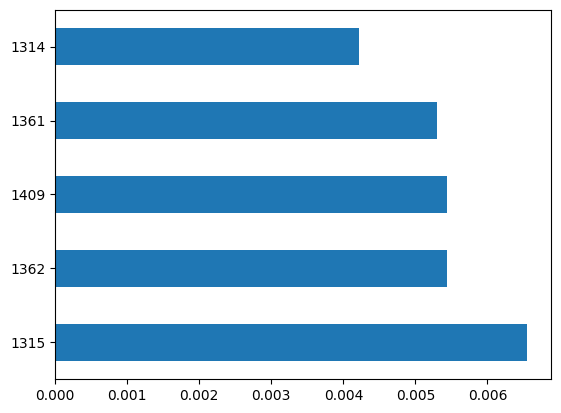

In [ ]:


model = ExtraTreesClassifier()
model.fit(x_train_all,y_train_0['Target'].values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train_all.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

[0.0001416  0.00043345 0.00025924 ... 0.00021651 0.00050062 0.00015956]


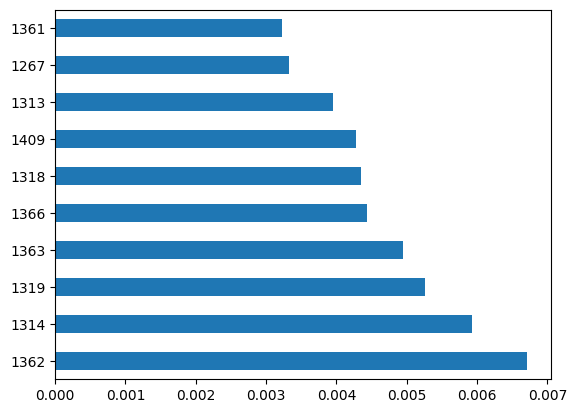

In [ ]:
model = ExtraTreesClassifier()
model.fit(x_train_all,y_train_0['Target'].values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train_all.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[2.54117602e-04 3.76483259e-04 1.66531222e-04 ... 7.49060899e-05
 1.59823040e-04 1.55253661e-04]


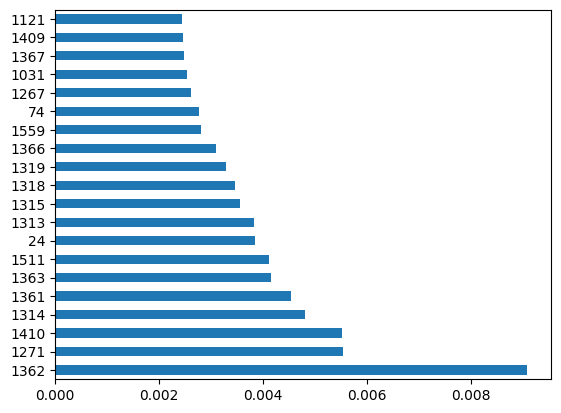

In [ ]:
model = ExtraTreesClassifier()
model.fit(x_train_all,y_train_0['Target'].values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train_all.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<span style="color:blue">***Conclusion***</span>

The accuracy of the model decreases as you include more features, with the top 5 features achieving the highest accuracy, followed by the top 10 features and then the top 20 features. This suggests that a more focused feature set leads to better model performance.

In the overall correlation experiment, it is observed that using a smaller set of features (top 5) led to the best model performance in terms of accuracy and area under the ROC curve. This suggests that feature selection can significantly impact the effectiveness of the model. The top 10 features also performed well, but the top 20 features showed a decrease in model performance.

The results indicate the importance of feature selection in machine learning. By choosing a more focused set of relevant features, we can improve the accuracy and efficiency of  model. It's essential to strike a balance between feature reduction and model performance, as using too many features can lead to overfitting and decreased model generalization.

Overall, the experiment highlights the importance of understanding the impact of feature selection on model performance and the need for fine-tuning our feature set to achieve the best results for a specific application.

## PART 2 - CLUSTERING

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc, silhouette_score
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import SMOTE
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import cv2  # OpenCV Python library for computer vision

In [ ]:
# dataset1.to_csv('/content/drive/MyDrive/ML Coursework datasets/dataset1.csv')
# dataset2.to_csv('/content/drive/MyDrive/ML Coursework datasets/dataset2.csv')
# dataset3.to_csv('/content/drive/MyDrive/ML Coursework datasets/dataset3.csv')
dataset1 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/dataset1.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/dataset2.csv')
dataset3 = pd.read_csv('/content/drive/MyDrive/ML Coursework datasets/dataset3.csv')

##Visualize

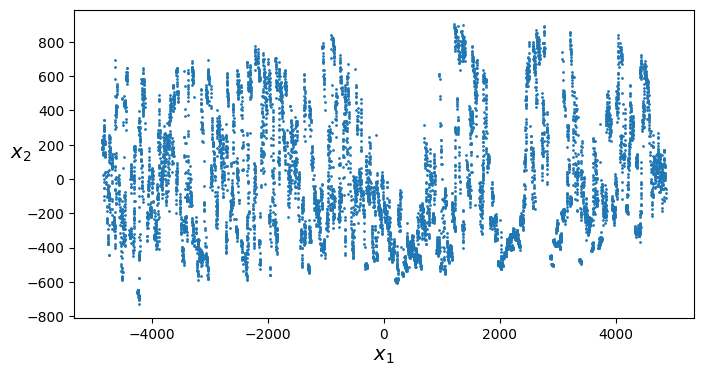

In [ ]:
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(dataset1)
pd.DataFrame(X2_pca).head(2)

def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X2_pca)

## Find Optimal clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

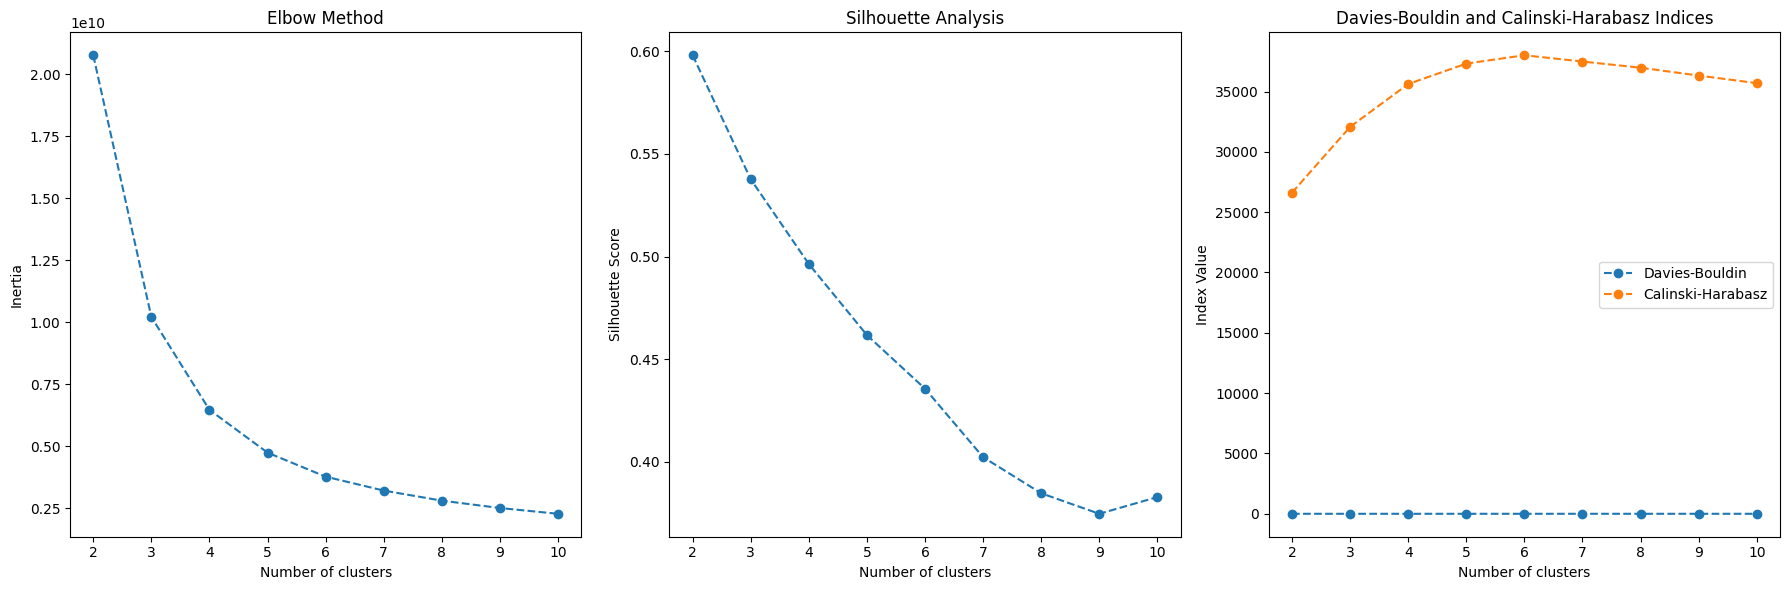

In [ ]:
inertia = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in range(2, 11):  # Try different values of k (from 2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=8)
    kmeans.fit(dataset1)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(dataset1, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(dataset1, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(dataset1, kmeans.labels_))

# Create subplots for multiple plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the Elbow method
axes[0].plot(range(2, 11), inertia, marker='o', linestyle='--')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')

# Plot the Silhouette Score
axes[1].plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')

# Plot the Davies-Bouldin Index and Calinski-Harabasz Index
axes[2].plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--', label='Davies-Bouldin')
axes[2].plot(range(2, 11), calinski_harabasz_scores, marker='o', linestyle='--', label='Calinski-Harabasz')
axes[2].set_xlabel('Number of clusters')
axes[2].set_ylabel('Index Value')
axes[2].set_title('Davies-Bouldin and Calinski-Harabasz Indices')
axes[2].legend()

plt.tight_layout()
plt.show()


## Cluster plotting with different k values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

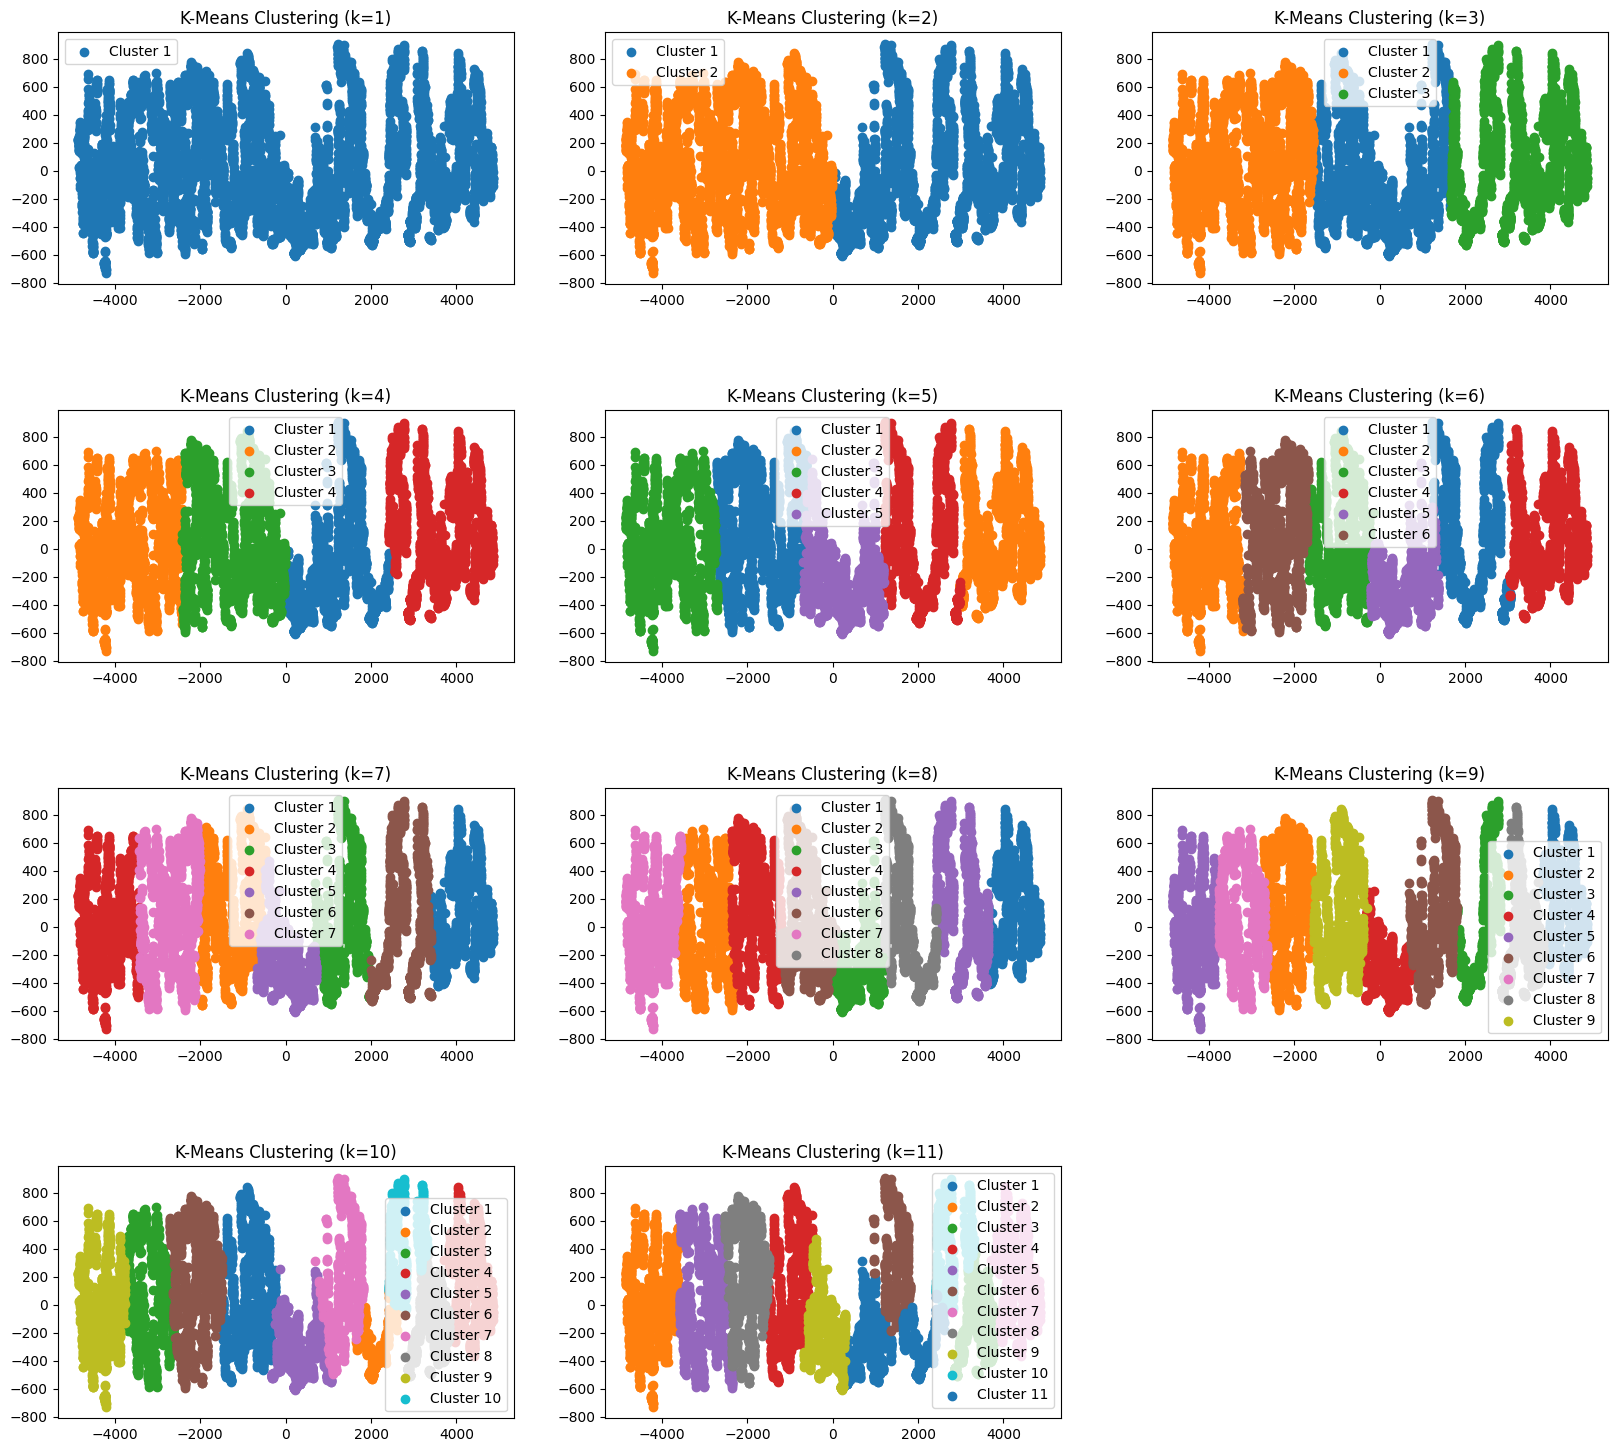

In [ ]:
# Create a range of values for k from 1 to 12
k_values = range(1, 12)

# Load or define your dataset (dataset1)

# Create a subplot grid for the plots
n_rows = 4  # Number of rows in the grid
n_cols = 3  # Number of columns in the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 18))
fig.subplots_adjust(hspace=0.5)

for i, k in enumerate(k_values):
    row = i // n_cols
    col = i % n_cols

    kmeans = KMeans(n_clusters=k, random_state=8)
    cluster_labels = kmeans.fit_predict(dataset1)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(dataset1)

    # Create a scatter plot for each cluster
    for j in range(k):
        axes[row, col].scatter(X_pca[cluster_labels == j, 0], X_pca[cluster_labels == j, 1], label=f'Cluster {j + 1}')

    axes[row, col].set_title(f'K-Means Clustering (k={k})')
    axes[row, col].legend()

# Hide any empty subplots
for i in range(len(k_values), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.show()

## Centroid plotting

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


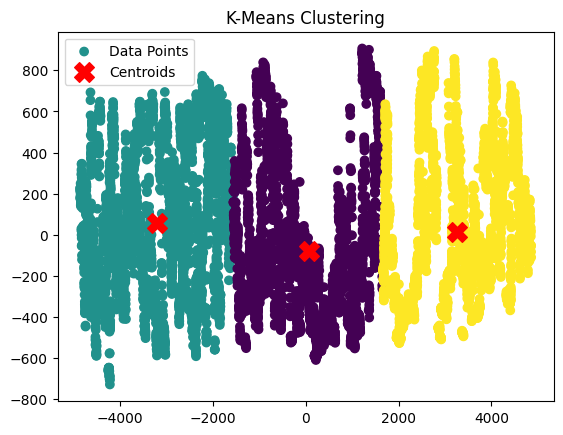

In [ ]:
k = 3  # Choose the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=8)
cluster_labels = kmeans.fit_predict(X_pca)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

# Plot the clusters in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


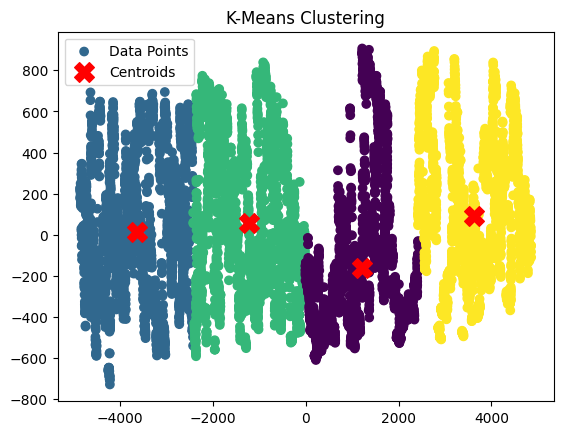

In [ ]:
k = 4  # Choose the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=8)
cluster_labels = kmeans.fit_predict(X_pca)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

# Plot the clusters in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


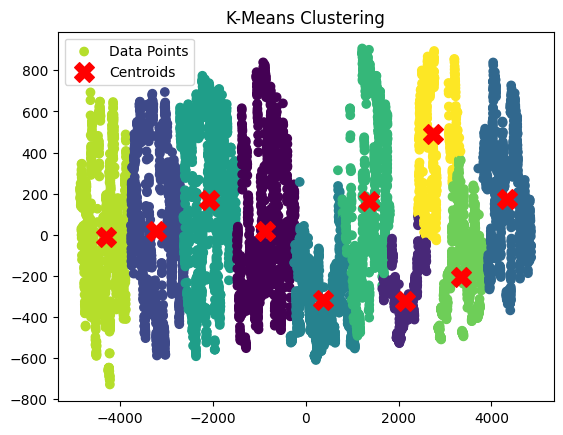

In [ ]:
k = 10  # Choose the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=8)
cluster_labels = kmeans.fit_predict(X_pca)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

# Plot the clusters in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


## Hard Clustering vs Soft Clustering
Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering.

## GMM Clustering

In [ ]:


# Range of cluster values to try
cluster_range = range(2, 12)

log_likelihoods = []
bics = []

for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=8)
    gmm.fit(dataset1)

    # Calculate Log-Likelihood
    log_likelihood = gmm.score(dataset1)
    log_likelihoods.append(log_likelihood)

    # Calculate BIC (Bayesian Information Criterion)
    bic = gmm.bic(dataset1)
    bics.append(bic)

    print(f"Number of Clusters: {k}")
    print(f"Log-Likelihood: {log_likelihood}")
    print(f"BIC: {bic}")
    print()

# Find the best number of clusters based on BIC (lower is better)
best_num_clusters = cluster_range[np.argmin(bics)]
print(f"The best number of clusters based on BIC: {best_num_clusters}")

# You can also find the best number of clusters based on Log-Likelihood (higher is better)
best_num_clusters_log_likelihood = cluster_range[np.argmax(log_likelihoods)]
print(f"The best number of clusters based on Log-Likelihood: {best_num_clusters_log_likelihood}")


Number of Clusters: 2
Log-Likelihood: -187.33937836198973
BIC: 3651335.458739876

Number of Clusters: 3
Log-Likelihood: -184.5263277578118
BIC: 3607172.2804980176

Number of Clusters: 4
Log-Likelihood: -182.34455014498604
BIC: 3575243.1728285654

Number of Clusters: 5
Log-Likelihood: -179.29833443412699
BIC: 3526561.2548192265

Number of Clusters: 6
Log-Likelihood: -177.7132697311361
BIC: 3506196.4433423737

Number of Clusters: 7
Log-Likelihood: -176.26743813697118
BIC: 3488529.9695145674

Number of Clusters: 8
Log-Likelihood: -175.52907249206746
BIC: 3484574.185783443



/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Number of Clusters: 9
Log-Likelihood: -172.40683961893617
BIC: 3434419.055169269

Number of Clusters: 10
Log-Likelihood: -172.49643229802004
BIC: 3446509.1037570243

Number of Clusters: 11
Log-Likelihood: -172.12322583502007
BIC: 3449630.1049711946

The best number of clusters based on BIC: 9
The best number of clusters based on Log-Likelihood: 11


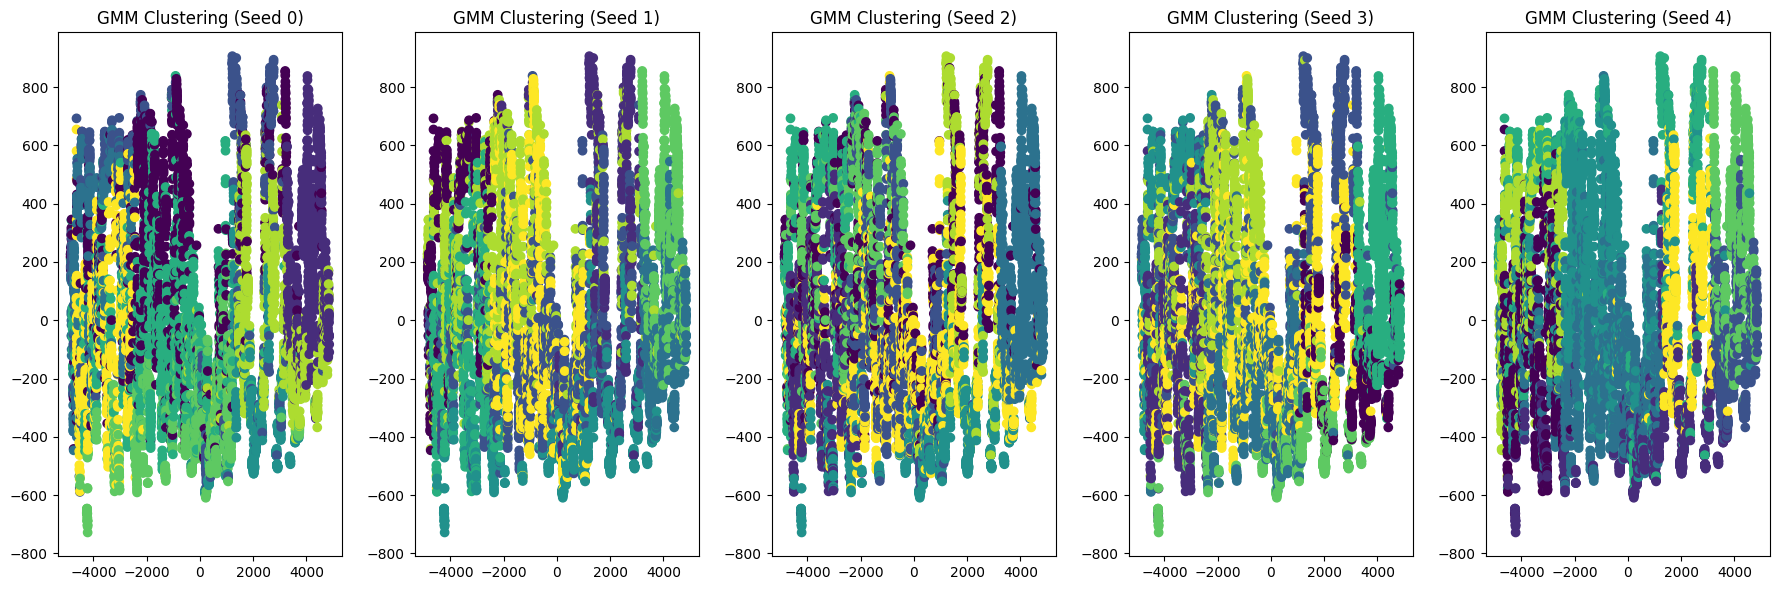

Seed 0 vs. Seed 1: 1060 matching cluster assignments
Seed 0 vs. Seed 2: 1532 matching cluster assignments
Seed 0 vs. Seed 3: 1101 matching cluster assignments
Seed 0 vs. Seed 4: 30 matching cluster assignments
Seed 1 vs. Seed 2: 2416 matching cluster assignments
Seed 1 vs. Seed 3: 564 matching cluster assignments
Seed 1 vs. Seed 4: 952 matching cluster assignments
Seed 2 vs. Seed 3: 2182 matching cluster assignments
Seed 2 vs. Seed 4: 481 matching cluster assignments
Seed 3 vs. Seed 4: 1369 matching cluster assignments


In [ ]:


# Number of clusters
k = 9

# Number of random seeds to try
num_seeds = 5

# Store cluster labels for each seed
all_cluster_labels = []

# Create subplots for multiple plots
fig, axes = plt.subplots(1, num_seeds, figsize=(18, 6))

for seed in range(num_seeds):
    gmm = GaussianMixture(n_components=k, random_state=seed)
    cluster_labels = gmm.fit(dataset1).predict(dataset1)

    all_cluster_labels.append(cluster_labels)

    # Plot the clusters in 2D
    axes[seed].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    axes[seed].set_title(f'GMM Clustering (Seed {seed})')

plt.tight_layout()
plt.show()

# Compare stability of cluster assignments
for i in range(num_seeds):
    for j in range(i + 1, num_seeds):
        matching_clusters = np.sum(all_cluster_labels[i] == all_cluster_labels[j])
        print(f"Seed {i} vs. Seed {j}: {matching_clusters} matching cluster assignments")


#### Optimal Number of Clusters:

Based on the Bayesian Information Criterion (BIC), the optimal number of clusters appears to be 9, while the highest Log-Likelihood is achieved with 11 clusters. This suggests that a model with 9 clusters provides a good trade-off between complexity and fit to the data, making it the recommended choice for clustering.

## AgglomerativeClustering

In [ ]:

# Range of cluster values to try
cluster_range = range(2, 12)

linkage_methods = ['ward', 'complete', 'average', 'single']  # Different linkage methods to try

best_num_clusters = None
best_linkage = None
best_silhouette_score = -1

for linkage in linkage_methods:
    for k in cluster_range:
        hierarchical = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        cluster_labels = hierarchical.fit_predict(dataset1)

        silhouette_avg = silhouette_score(dataset1, cluster_labels)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_num_clusters = k
            best_linkage = linkage

        print(f"Number of Clusters: {k}")
        print(f"Linkage Method: {linkage}")
        print(f"Silhouette Score: {silhouette_avg}")
        print()

print(f"The best number of clusters based on Silhouette Score: {best_num_clusters}")
print(f"The best linkage method based on Silhouette Score: {best_linkage}")


Number of Clusters: 2
Linkage Method: ward
Silhouette Score: 0.5907789545867487

Number of Clusters: 3
Linkage Method: ward
Silhouette Score: 0.5199348264067637

Number of Clusters: 4
Linkage Method: ward
Silhouette Score: 0.4552431799772955

Number of Clusters: 5
Linkage Method: ward
Silhouette Score: 0.4141612732037799

Number of Clusters: 6
Linkage Method: ward
Silhouette Score: 0.3967097900517327

Number of Clusters: 7
Linkage Method: ward
Silhouette Score: 0.38029838024819457

Number of Clusters: 8
Linkage Method: ward
Silhouette Score: 0.35784119924861796

Number of Clusters: 9
Linkage Method: ward
Silhouette Score: 0.3468733605844614

Number of Clusters: 10
Linkage Method: ward
Silhouette Score: 0.35633836419186077

Number of Clusters: 11
Linkage Method: ward
Silhouette Score: 0.3611709186173002

Number of Clusters: 2
Linkage Method: complete
Silhouette Score: 0.586855485457682

Number of Clusters: 3
Linkage Method: complete
Silhouette Score: 0.4918276538954633

Number of Cluste

Certainly! In hierarchical clustering, linkage methods are used to determine how the distance between clusters is measured and how clusters are merged as the algorithm progresses. There are several common linkage methods, each with its own characteristics:

Ward Linkage (ward): This method aims to minimize the variance of distances between clusters. It tends to merge clusters that have the smallest increase in the total within-cluster variance. Ward linkage is often preferred when you want to create compact and balanced clusters.

Complete Linkage (complete): Also known as maximum linkage, it computes the maximum pairwise distance between data points in two clusters. It tends to produce clusters with more distinct and widely spread data points.

Average Linkage (average): It calculates the average of all pairwise distances between data points in two clusters. This method is less sensitive to outliers and can lead to more evenly sized clusters.

Single Linkage (single): This method uses the minimum pairwise distance between data points in two clusters. It can create long, elongated clusters and is sensitive to noise and outliers.

Agglomerative Clustering: This is a hierarchical clustering method that starts with each data point as a separate cluster and iteratively merges the closest clusters until there is only one cluster that contains all data points. The "best" number of clusters is determined based on the dendrogram, where you can visually inspect the hierarchical structure to identify a suitable number of clusters. You can choose the number of clusters that makes the most sense for your specific problem, depending on where you cut the dendrogram.

Gaussian Mixture Models: GMM is a probabilistic model-based clustering method that models data as a mixture of several Gaussian distributions. The best number of clusters in GMM is typically chosen using criteria like the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC). These criteria consider both the likelihood of the data given the model and the number of parameters in the model. GMM tries to fit a Gaussian distribution for each cluster, and the number of clusters is based on the trade-off between model complexity and how well the model fits the data.

The reason why the best number of clusters can differ between these methods is that they have different underlying assumptions and approaches. Agglomerative Clustering does not make strong assumptions about the shape of clusters, while GMM assumes that data is generated from a mixture of Gaussian distributions. Therefore, the optimal number of clusters in GMM is often determined by the structure of the data and how well it can be explained by Gaussian distributions, which may not align with the hierarchical structure that Agglomerative Clustering uncovers.

To choose the best clustering approach for your specific problem, we may need to consider the characteristics of data, the goals of analysis, and possibly try multiple methods to determine which one provides the most meaningful and interpretable results. Additionally, domain knowledge and external evaluation metrics can also guide your choice of the best number of clusters.

#

In [ ]:
Y_dataframe = pd.DataFrame(Y)

In [ ]:

# Assuming you have already converted your NumPy array to a DataFrame as Y_dataframe

Y_dataframe = Y_dataframe.rename(columns={0: 'labels'})
Y_dataframe.head()


,labels
0,0
1,0
2,0
3,0
4,0


## Gaussian with all 3 datasets

In [ ]:


# Define a list of datasets
datasets = [dataset1, dataset2, dataset3]

# Define the labels (assuming you have these)
Y = Y  # Replace 'Y' with your actual labels

# Loop through the datasets
for i, X in enumerate(datasets):

    # Split the data into a training set and a test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Perform Bayesian Classification (Gaussian Naive Bayes)
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_test)

    # Calculate the accuracy of Gaussian Naive Bayes Classification
    bayesian_accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Dataset {i + 1}:")
    print(f"Accuracy of Gaussian Naive Bayes Classification: {bayesian_accuracy:.2%}")

    # Perform Clustering (e.g., K-Means or Agglomerative Clustering)
    k = 10  # Choose the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=8)
    kmeans_labels = kmeans.fit_predict(X)
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglomerative_labels = agglomerative.fit_predict(X)

    # Calculate the accuracy of clustering
    # You need a ground truth (Y) to compare with clustering results
    kmeans_accuracy = accuracy_score(Y, kmeans_labels)
    agglomerative_accuracy = accuracy_score(Y, agglomerative_labels)

    print(f"Accuracy of K-Means Clustering: {kmeans_accuracy:.2%}")
    print(f"Accuracy of Agglomerative Clustering: {agglomerative_accuracy:.2%}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dataset 1:
Accuracy of Gaussian Naive Bayes Classification: 68.97%
Accuracy of K-Means Clustering: 35.91%
Accuracy of Agglomerative Clustering: 0.00%

Dataset 2:
Accuracy of Gaussian Naive Bayes Classification: 62.78%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of K-Means Clustering: 0.47%
Accuracy of Agglomerative Clustering: 9.77%

Dataset 3:
Accuracy of Gaussian Naive Bayes Classification: 57.55%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of K-Means Clustering: 0.00%
Accuracy of Agglomerative Clustering: 17.89%



Conclusion:
Same as the classification problem, even with unsupervised learning algorithms -  the accuracy of the model decreases when we add additional features. Or it just works better when we have the top best features in place.

## Multinomial Naive Bayes with all 3 datasets

In [ ]:


# Define a list of datasets
datasets = [dataset1, dataset2, dataset3]

# Define the labels (assuming you have these)
Y = Y  # Replace 'Y' with your actual labels

# Loop through the datasets
for i, X in enumerate(datasets):

    # Split the data into a training set and a test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Perform Bayesian Classification (Multinomial Naive Bayes)
    mnb = MultinomialNB()
    mnb.fit(X_train, Y_train)
    Y_pred = mnb.predict(X_test)

    # Calculate the accuracy of Multinomial Naive Bayes Classification
    bayesian_accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Dataset {i + 1}:")
    print(f"Accuracy of Multinomial Naive Bayes Classification: {bayesian_accuracy:.2%}")

    # Perform Clustering (e.g., K-Means or Agglomerative Clustering)
    k = 10  # Choose the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=8)
    kmeans_labels = kmeans.fit_predict(X)
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglomerative_labels = agglomerative.fit_predict(X)

    # Calculate the accuracy of clustering
    # You need a ground truth (Y) to compare with clustering results
    kmeans_accuracy = accuracy_score(Y, kmeans_labels)
    agglomerative_accuracy = accuracy_score(Y, agglomerative_labels)

    print(f"Accuracy of K-Means Clustering: {kmeans_accuracy:.2%}")
    print(f"Accuracy of Agglomerative Clustering: {agglomerative_accuracy:.2%}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dataset 1:
Accuracy of Multinomial Naive Bayes Classification: 53.01%
Accuracy of K-Means Clustering: 9.40%
Accuracy of Agglomerative Clustering: 8.36%

Dataset 2:
Accuracy of Multinomial Naive Bayes Classification: 54.63%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of K-Means Clustering: 0.98%
Accuracy of Agglomerative Clustering: 15.12%

Dataset 3:
Accuracy of Multinomial Naive Bayes Classification: 56.24%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of K-Means Clustering: 2.68%
Accuracy of Agglomerative Clustering: 0.00%



## Bernoulli with all 3 datasets

In [ ]:


# Define a list of datasets
datasets = [dataset1, dataset2, dataset3]

# Define the labels (assuming you have these)
Y = Y  # Replace 'Y' with your actual labels

# Loop through the datasets
for i, X in enumerate(datasets):

    # Split the data into a training set and a test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Perform Bayesian Classification (Bernoulli Naive Bayes)
    bnb = BernoulliNB()
    bnb.fit(X_train, Y_train)
    Y_pred = bnb.predict(X_test)

    # Calculate the accuracy of Bernoulli Naive Bayes Classification
    bayesian_accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Dataset {i + 1}:")
    print(f"Accuracy of Bernoulli Naive Bayes Classification: {bayesian_accuracy:.2%}")

    # Perform Clustering (e.g., K-Means or Agglomerative Clustering)
    k = 10  # Choose the number of clusters
    kmeans = KMeans(n_clusters=k, random_state=8)
    kmeans_labels = kmeans.fit_predict(X)
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglomerative_labels = agglomerative.fit_predict(X)

    # Calculate the accuracy of clustering
    # You need a ground truth (Y) to compare with clustering results
    kmeans_accuracy = accuracy_score(Y, kmeans_labels)
    agglomerative_accuracy = accuracy_score(Y, agglomerative_labels)

    print(f"Accuracy of K-Means Clustering: {kmeans_accuracy:.2%}")
    print(f"Accuracy of Agglomerative Clustering: {agglomerative_accuracy:.2%}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dataset 1:
Accuracy of Bernoulli Naive Bayes Classification: 23.32%
Accuracy of K-Means Clustering: 9.40%
Accuracy of Agglomerative Clustering: 8.36%

Dataset 2:
Accuracy of Bernoulli Naive Bayes Classification: 23.32%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of K-Means Clustering: 0.98%
Accuracy of Agglomerative Clustering: 15.12%

Dataset 3:
Accuracy of Bernoulli Naive Bayes Classification: 23.32%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of K-Means Clustering: 2.68%
Accuracy of Agglomerative Clustering: 0.00%



### ***Conclusion:***
In summary, Gaussian Naive Bayes performed well in classifying the data, while K-Means and Agglomerative Clustering had difficulty in capturing the underlying patterns in the data. Multinomial and Bernoulli Naive Bayes showed consistent but lower accuracy across datasets. The choice of classification or clustering method should depend on the specific dataset and problem requirements.

### PART 3 - SUPERVISED LEARNING: GENERALIZATION AND OVERFITTING : DECISION TREE

Train and predict Decision Tree algorithm on Original data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Initialize SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data
# We can proceed to train the machine learning model on this balanced dataset

In [ ]:


# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the RandomUnderSampler to the training data only
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the balanced training data with undersampling
# we can proceed to train your machine learning model on this balanced dataset

In [ ]:


 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=8)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Display more classification metrics
print(classification_report(y_test, y_pred))

Accuracy on the test set: 83.44%
              precision    recall  f1-score   support

           0       0.57      0.72      0.63        46
           1       0.86      0.82      0.84       451
           2       0.84      0.83      0.84       457
           3       0.89      0.86      0.87       288
           4       0.84      0.87      0.86       392
           5       0.67      0.75      0.71        44
           6       0.85      0.80      0.82        69
           7       0.78      0.81      0.79        47
           8       0.84      0.90      0.87        91
           9       0.70      0.74      0.72        53

    accuracy                           0.83      1938
   macro avg       0.78      0.81      0.79      1938
weighted avg       0.84      0.83      0.84      1938



In [ ]:

def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

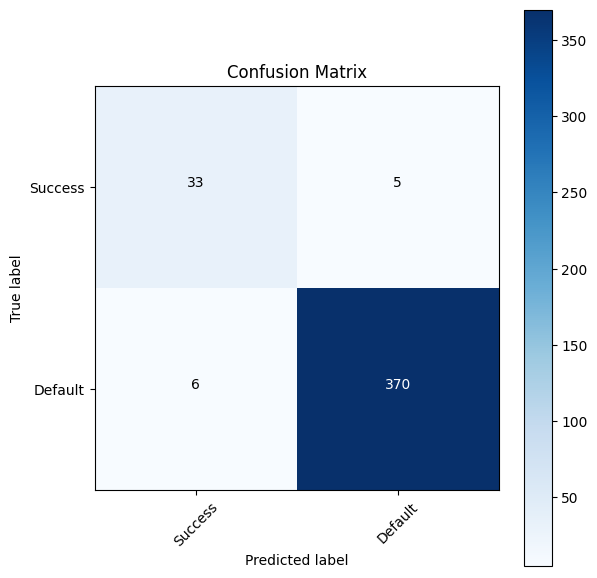

In [ ]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

## Visualize the decision tree

In [ ]:
!pip install scikit-learn graphviz pydotplus

In [ ]:


# Create a visualization of the Decision Tree
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["Class 0","Class 1","Class 2","Class 3","Class 4","Class 5","Class 6","Class 7","Class 8","Class 9"])
graph = pydotplus.graph_from_dot_data(dot_data)
graphviz.Source(dot_data).render("decision_tree")  # This will create a PDF file with the decision tree visualization

'decision_tree.pdf'

[Text(0.3978862069496959, 0.975, 'x[1264] <= 84.5\ngini = 0.824\nsamples = 7752\nvalue = [164, 1769, 1793, 1122, 1588, 166, 291, 193, 449, 217]'),
 Text(0.17287355642774946, 0.925, 'x[983] <= 39.5\ngini = 0.828\nsamples = 3284\nvalue = [9, 263, 360, 944, 744, 120, 274, 137, 262, 171]'),
 Text(0.033546358704586554, 0.875, 'x[1170] <= 19.5\ngini = 0.563\nsamples = 913\nvalue = [0, 31, 52, 192, 568, 24, 27, 11, 8, 0]'),
 Text(0.00821962847279303, 0.825, 'x[928] <= 11.5\ngini = 0.588\nsamples = 197\nvalue = [0, 1, 4, 119, 31, 24, 17, 0, 1, 0]'),
 Text(0.0026302811112937697, 0.775, 'x[1478] <= 8.5\ngini = 0.512\nsamples = 55\nvalue = [0, 0, 0, 1, 30, 24, 0, 0, 0, 0]'),
 Text(0.0013151405556468849, 0.725, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 0, 0, 30, 0, 0, 0, 0, 0]'),
 Text(0.003945421666940654, 0.725, 'x[962] <= 10.0\ngini = 0.077\nsamples = 25\nvalue = [0, 0, 0, 1, 0, 24, 0, 0, 0, 0]'),
 Text(0.0026302811112937697, 0.675, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 0, 0, 0, 24, 0, 0, 0

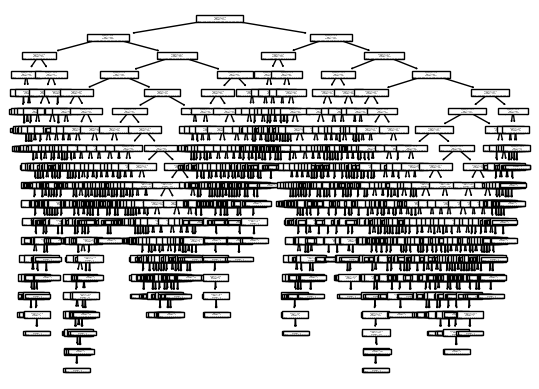

In [ ]:

tree.plot_tree(clf)

Train and predict Decision Tree algorithm on balanced data (Oversampled)

In [ ]:

# X_train_resampled and y_train_resampled contain the balanced training data (Oversampled data)
# We can proceed to train the machine learning model on this balanced dataset

# Train a Decision Tree classifier on the balanced training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Display more classification metrics
print(classification_report(y_test, y_pred))


Accuracy on the test set: 81.63%
              precision    recall  f1-score   support

           0       0.60      0.74      0.66        46
           1       0.82      0.79      0.81       451
           2       0.83      0.78      0.80       457
           3       0.86      0.84      0.85       288
           4       0.81      0.85      0.83       392
           5       0.91      0.91      0.91        44
           6       0.79      0.84      0.82        69
           7       0.84      0.89      0.87        47
           8       0.79      0.85      0.81        91
           9       0.75      0.79      0.77        53

    accuracy                           0.82      1938
   macro avg       0.80      0.83      0.81      1938
weighted avg       0.82      0.82      0.82      1938



Train and predict Decision Tree algorithm on balanced data (Undersampled)

In [ ]:

# X_train_under and y_train_under contain the balanced training data (undersampled data)
# We can proceed to train the machine learning model on this balanced dataset

# Train a Decision Tree classifier on the balanced training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_under, y_train_under)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Display more classification metrics
print(classification_report(y_test, y_pred))


Accuracy on the test set: 62.90%
              precision    recall  f1-score   support

           0       0.35      0.74      0.48        46
           1       0.62      0.52      0.56       451
           2       0.72      0.51      0.60       457
           3       0.69      0.73      0.71       288
           4       0.63      0.65      0.64       392
           5       0.62      0.91      0.73        44
           6       0.72      0.91      0.81        69
           7       0.58      0.85      0.69        47
           8       0.57      0.74      0.64        91
           9       0.44      0.81      0.57        53

    accuracy                           0.63      1938
   macro avg       0.59      0.74      0.64      1938
weighted avg       0.65      0.63      0.63      1938



<font color='green'><b>Findings:</b></font>

Overall, decision trees can work reasonably well with unbalanced datasets as well.

<font color='green'><b>Non-reliance on Class Distribution:</b></font>

Decision trees make splits in the data based on feature values and impurity measures (e.g., Gini impurity or entropy) rather than relying solely on the class distribution. As a result, they can still find decision boundaries that separate the classes, even in the presence of class imbalance.

In summary, decision trees can handle unbalanced datasets, but we may need to take additional steps to mitigate the impact of class imbalance and improve model performance.


#### 10 FOLD CROSS VALIDATION ON ORIGINAL SET

In [ ]:

# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("\n10-Fold Cross-Validation Results on the Training Set:")
print("Mean Accuracy: {:.2f}%".format(mean_cv_score * 100))
print("Standard Deviation of Accuracy: {:.2f}%".format(std_cv_score * 100))


10-Fold Cross-Validation Results on the Training Set:
Mean Accuracy: 75.97%
Standard Deviation of Accuracy: 1.28%


<font color='green'><b>Findings:</b></font>

10-fold cross-validation accuracy is slightly lower than the accuracy on a single train-test split

<font color='green'><b>Reasons:</b></font>

Smaller Training Sets: In each fold of cross-validation, the model is trained on a smaller portion of the data compared to the full training set. This can lead to a slightly lower accuracy as the model may not have as much data to learn from in each fold.

Variability: Cross-validation considers different subsets of the data for training and testing in each fold, leading to variability in the results. The standard deviation of accuracy (1.34%) indicates this variability.

Bias-Variance Trade-off: Cross-validation can provide a better estimate of a model's generalization performance by reducing the risk of overfitting, but it might slightly underestimate the model's true performance on the specific train-test split you used earlier.

<font color='green'><b>Conclusion:</b></font>

In practice, the 10-fold cross-validation result (81.31%) is a more robust estimate of your model's performance, as it accounts for variability and provides a better assessment of how well the model is likely to perform on unseen data. The earlier single train-test split result (83%) might be overly optimistic and less indicative of the model's generalization performance.

#### TRAIN AND TEST ON COMPLETELY NEW TEST SET TO UNDERSTAND THE MODEL GENERALIZATION

In [ ]:
# Train a Decision Tree classifier
clff = DecisionTreeClassifier(random_state=48)
clff.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = clff.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Display more classification metrics
print(classification_report(ytest, ypred))

Accuracy on the test set: 69.03%
              precision    recall  f1-score   support

           0       0.26      0.35      0.30        60
           1       0.72      0.80      0.76       720
           2       0.74      0.76      0.75       750
           3       0.67      0.68      0.67       450
           4       0.73      0.71      0.72       660
           5       0.48      0.50      0.49        60
           6       0.49      0.41      0.45        90
           7       0.36      0.23      0.28        60
           8       0.69      0.44      0.54       150
           9       0.61      0.43      0.51        90

    accuracy                           0.69      3090
   macro avg       0.58      0.53      0.55      3090
weighted avg       0.69      0.69      0.69      3090



<font color='green'><b>Findings:</b></font>

The model exhibited an accuracy of 83.44% on the training set, indicating a good understanding and learning of the patterns present in the training data. However, the drop in accuracy to 69.03% on the completely different test set suggests that the model may struggle to generalize its knowledge to new, unseen instances. This performance gap highlights potential issues such as overfitting, where the model might have memorized the training set rather than learning generalizable patterns.

Regularization techniques or more diverse training data may help address this issue.

Addressing these issues through appropriate model tuning, regularization, or increasing the diversity of the training data may lead to improved generalization and overall model performance on unseen instances.

## **Experiment with various decision tree parameters that control the size of the tree: depth of the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances permissible per leaf**

In [ ]:


# Define parameters to experiment with
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 9, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Initialize variables to track the best parameters and accuracy
best_params = None
best_accuracy = 0.0

# Iterate over parameter combinations
for depth in params['max_depth']:
    for min_samples in params['min_samples_leaf']:
        for criterion in params['criterion']:
            for min_impurity in params['min_impurity_decrease']:
                # Create and train the decision tree
                dt_classifier = DecisionTreeClassifier(
                    max_depth=depth,
                    min_samples_leaf=min_samples,
                    criterion=criterion,
                    min_impurity_decrease=min_impurity
                )
                dt_classifier.fit(xtrain, ytrain)

                # Make predictions on the test set
                y_pred_test = dt_classifier.predict(xtest)

                # Evaluate performance on the test set
                accuracy = accuracy_score(ytest, y_pred_test)

                # Check if the current model has a higher accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'depth': depth,
                        'min_samples_leaf': min_samples,
                        'criterion': criterion,
                        'min_impurity_decrease': min_impurity
                    }

                # Print or store results
                print(f"Parameters: depth={depth}, min_samples_leaf={min_samples}, criterion={criterion}, min_impurity_decrease={min_impurity}, Accuracy={accuracy}")

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Parameters: depth=3, min_samples_leaf=1, criterion=gini, min_impurity_decrease=0.0, Accuracy=0.47249190938511326
Parameters: depth=3, min_samples_leaf=1, criterion=gini, min_impurity_decrease=0.1, Accuracy=0.24271844660194175
Parameters: depth=3, min_samples_leaf=1, criterion=gini, min_impurity_decrease=0.2, Accuracy=0.24271844660194175
Parameters: depth=3, min_samples_leaf=1, criterion=entropy, min_impurity_decrease=0.0, Accuracy=0.4980582524271845
Parameters: depth=3, min_samples_leaf=1, criterion=entropy, min_impurity_decrease=0.1, Accuracy=0.33171521035598706
Parameters: depth=3, min_samples_leaf=1, criterion=entropy, min_impurity_decrease=0.2, Accuracy=0.31974110032362457
Parameters: depth=3, min_samples_leaf=5, criterion=gini, min_impurity_decrease=0.0, Accuracy=0.47249190938511326
Parameters: depth=3, min_samples_leaf=5, criterion=gini, min_impurity_decrease=0.1, Accuracy=0.24271844660194175
Parameters: depth=3, min_samples_leaf=5, criterion=gini, min_impurity_decrease=0.2, Accu

In [ ]:

#Training set
# Define parameters to experiment with
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 9, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

best_params = None
best_accuracy = 0.0

# Iterate over parameter combinations
for depth in params['max_depth']:
    for min_samples in params['min_samples_leaf']:
        for criterion in params['criterion']:
            for min_impurity in params['min_impurity_decrease']:
                # Create and train the decision tree
                dt_classifier = DecisionTreeClassifier(
                    max_depth=depth,
                    min_samples_leaf=min_samples,
                    criterion=criterion,
                    min_impurity_decrease=min_impurity
                )
                dt_classifier.fit(xtrain, ytrain)

                # Make predictions on the training  set
                y_pred = dt_classifier.predict(xtrain)

                # Evaluate performance
                accuracy = accuracy_score(ytrain, y_pred)

                 # Check if the current model has a higher accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'depth': depth,
                        'min_samples_leaf': min_samples,
                        'criterion': criterion,
                        'min_impurity_decrease': min_impurity
                    }

                # Print or store results
                print(f"Parameters: depth={depth}, min_samples_leaf={min_samples}, criterion={criterion}, min_impurity_decrease={min_impurity}, Accuracy={accuracy}")
# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Parameters: depth=None, min_samples_leaf=1, criterion=gini, min_impurity_decrease=0.0, Accuracy=1.0
Parameters: depth=None, min_samples_leaf=1, criterion=gini, min_impurity_decrease=0.1, Accuracy=0.23219814241486067
Parameters: depth=None, min_samples_leaf=1, criterion=gini, min_impurity_decrease=0.2, Accuracy=0.23219814241486067
Parameters: depth=None, min_samples_leaf=1, criterion=entropy, min_impurity_decrease=0.0, Accuracy=1.0
Parameters: depth=None, min_samples_leaf=1, criterion=entropy, min_impurity_decrease=0.1, Accuracy=0.32920536635706915
Parameters: depth=None, min_samples_leaf=1, criterion=entropy, min_impurity_decrease=0.2, Accuracy=0.31651186790505675
Parameters: depth=None, min_samples_leaf=2, criterion=gini, min_impurity_decrease=0.0, Accuracy=0.9782249742002064
Parameters: depth=None, min_samples_leaf=2, criterion=gini, min_impurity_decrease=0.1, Accuracy=0.23219814241486067
Parameters: depth=None, min_samples_leaf=2, criterion=gini, min_impurity_decrease=0.2, Accuracy=

Shows the depth of the tree has an impact on the accuarcy of the classifier.The entropy has the highest information gain, the lower the better.

Best Parameters: {'depth': None, 'min_samples_leaf': 1, 'criterion': 'gini', 'min_impurity_decrease': 0.0}

Best Accuracy: 1.0

In [ ]:

# Train a Decision Tree classifier (Based on the recommended of the base parameter tweaking above.)
# Train a Decision Tree classifier (Based on Recommended grid search above)
clff = DecisionTreeClassifier(
                    max_depth=None,
                    min_samples_leaf=1,
                    criterion='gini',
                    min_impurity_decrease=0.0
                )
clff.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = clff.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Display more classification metrics
print(classification_report(ytest, ypred))


Accuracy on the test set: 68.93%
              precision    recall  f1-score   support

           0       0.30      0.32      0.31        60
           1       0.71      0.79      0.75       720
           2       0.75      0.76      0.76       750
           3       0.69      0.67      0.68       450
           4       0.74      0.71      0.72       660
           5       0.51      0.48      0.50        60
           6       0.54      0.48      0.51        90
           7       0.29      0.32      0.30        60
           8       0.58      0.43      0.49       150
           9       0.61      0.51      0.55        90

    accuracy                           0.69      3090
   macro avg       0.57      0.55      0.56      3090
weighted avg       0.69      0.69      0.69      3090



## Finding best parameters using GRIDSEARCHCV

In [ ]:

np.random.seed(42)
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()
start = time.time()
# Define the parameter grid for the decision tree
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

# Use GridSearchCV with the decision tree classifier
cv_dt = GridSearchCV(dt_classifier, cv=10, param_grid=param_dist, n_jobs=3)
# Assuming 'training_set' and 'class_set' are your training data and labels
cv_dt.fit(xtrain, ytrain)
print('Best Parameters using grid search: \n', cv_dt.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

#Best Parameters using grid search:
 #{'criterion': 'entropy', 'max_depth': 4}
#Time taken in grid search:  67.13


In [ ]:
# Train a Decision Tree classifier (Based on Recommended grid search above)
clff = DecisionTreeClassifier(
                    max_depth=7,
                    min_samples_leaf= 1,
                    criterion='entropy',
                    min_impurity_decrease=0.0
                )
clff.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = clff.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Display more classification metrics
print(classification_report(ytest, ypred))



Accuracy on the test set: 71.25%
              precision    recall  f1-score   support

           0       0.56      0.42      0.48        57
           1       0.70      0.73      0.71       642
           2       0.67      0.75      0.70       659
           3       0.79      0.66      0.72       428
           4       0.80      0.74      0.77       594
           5       0.74      0.56      0.64        62
           6       0.69      0.67      0.68       100
           7       0.68      0.74      0.71        72
           8       0.63      0.77      0.69       163
           9       0.67      0.58      0.62        72

    accuracy                           0.71      2849
   macro avg       0.69      0.66      0.67      2849
weighted avg       0.72      0.71      0.71      2849



##  Moving 30% of the instances from the original training set into the testing set


In [ ]:


# Assuming you have xtrain, ytrain, xtest, ytest defined or loaded with appropriate values

# Create a Decision Tree classifier
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(xtrain, ytrain, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(
                    max_depth=7,
                    min_samples_leaf= 1,
                    criterion='entropy',
                    min_impurity_decrease=0.0)

# Train the classifier on the new training set
clf.fit(xtrain1, ytrain1)

# Make predictions on the new testing set
y_pred_test = clf.predict(xtest1)

# Calculate accuracy on the new testing set
accuracy_test = accuracy_score(ytest1, y_pred_test)
print("Accuracy on the new testing set: {:.2f}%".format(accuracy_test * 100))


Accuracy on the new testing set: 68.95%


##  Moving 60% of the instances from the original training set into the testing set

In [ ]:


# Assuming you have xtrain, ytrain, xtest, ytest defined or loaded with appropriate values

# Create a Decision Tree classifier
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xtrain, ytrain, test_size=0.6, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(
                    max_depth=7,
                    min_samples_leaf= 1,
                    criterion='entropy',
                    min_impurity_decrease=0.0)

# Train the classifier on the new training set
clf.fit(xtrain2, ytrain2)

# Make predictions on the new testing set
y_pred_test = clf.predict(xtest2)

# Calculate accuracy on the new testing set
accuracy_test = accuracy_score(ytest2, y_pred_test)
print("Accuracy on the new testing set: {:.2f}%".format(accuracy_test * 100))

Accuracy on the new testing set: 60.35%


<font color='green'><b>Findings:</b></font>

New training and testing sets were created by moving 30% and 60% of instances from the original training set to the testing set.

For the 30%:
The accuracy based on the test set was 68.95%%.
For the 60%:
The accuracy based on the test set was 60.35%.

The model is sensitive to the size of the training set. The smaller the training, the lower the accuracy.

#### RANDOM FOREST ALGORITHM

Run the classifier without cross fold and hyper parameter tuning

In [ ]:



# Assuming you have X and Y defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=8)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy on the test set: {:.2f}%".format(accuracy_rf * 100))

# Display more classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


<ipython-input-44-15a65b052fc8>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


Accuracy on the test set: 97.42%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90        46
           1       0.96      0.97      0.97       451
           2       0.98      0.98      0.98       457
           3       0.97      0.99      0.98       288
           4       0.97      0.98      0.97       392
           5       1.00      0.93      0.96        44
           6       1.00      0.96      0.98        69
           7       1.00      1.00      1.00        47
           8       1.00      0.98      0.99        91
           9       0.96      0.98      0.97        53

    accuracy                           0.97      1938
   macro avg       0.98      0.96      0.97      1938
weighted avg       0.97      0.97      0.97      1938



10 folds on Random forest

In [ ]:


# Assuming you have X and Y defined

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=8)

# Perform 10-fold cross-validation on the training set
cv_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')

# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score_rf = np.mean(cv_scores_rf)
std_cv_score_rf = np.std(cv_scores_rf)

print("\n10-Fold Cross-Validation Results on the Training Set (Random Forest):")
print("Mean Accuracy: {:.2f}%".format(mean_cv_score_rf * 100))
print("Standard Deviation of Accuracy: {:.2f}%".format(std_cv_score_rf * 100))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe


10-Fold Cross-Validation Results on the Training Set (Random Forest):
Mean Accuracy: 96.61%
Standard Deviation of Accuracy: 0.46%


Run the classifier on completely new test set to understand the model generalization

In [ ]:


# Assuming you have xtrain, ytrain, xtest, and ytest defined

# Train a Random Forest classifier
rf_clff = RandomForestClassifier(random_state=48)
rf_clff.fit(xtrain, ytrain)

# Make predictions on the test set
ypred_rf = rf_clff.predict(xtest)

# Calculate accuracy
accuracy_rf = accuracy_score(ytest, ypred_rf)
print("Accuracy on the test set: {:.2f}%".format(accuracy_rf * 100))

# Display more classification metrics
print("Classification Report:\n", classification_report(ytest, ypred_rf))


<ipython-input-46-8fcc842c61f3>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clff.fit(xtrain, ytrain)


Accuracy on the test set: 97.42%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.95      0.98      0.96       451
           2       0.98      0.98      0.98       457
           3       0.98      0.98      0.98       288
           4       0.97      0.98      0.98       392
           5       1.00      0.95      0.98        44
           6       0.99      0.96      0.97        69
           7       1.00      0.98      0.99        47
           8       1.00      0.96      0.98        91
           9       0.98      0.94      0.96        53

    accuracy                           0.97      1938
   macro avg       0.99      0.96      0.97      1938
weighted avg       0.97      0.97      0.97      1938



BEST HYPERPARAMETERS

In [ ]:


# Assuming you have xtrain, ytrain defined

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=48)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Cross-Validation Set: {:.2f}%".format(grid_search.best_score_ * 100))

# Evaluate the model on the test set using the best parameters
best_rf_classifier = grid_search.best_estimator_
y_pred_rf = best_rf_classifier.predict(xtest)
accuracy_rf = accuracy_score(ytest, y_pred_rf)
print("Accuracy on Test Set using Best Parameters: {:.2f}%".format(accuracy_rf * 100))

# Display more classification metrics
print("Classification Report on Test Set:\n", classification_report(ytest, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: Fut

In [ ]:


# Assuming you have xtrain, ytrain defined

# Create a Random Forest classifier with best parameters
rf_clff = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True,
    random_state=48
)

# Train the Random Forest classifier
rf_clff.fit(xtrain, ytrain)

# Make predictions on the test set
ypred_rf = rf_clff.predict(xtest)

# Calculate accuracy
accuracy_rf = accuracy_score(ytest, ypred_rf)
print("Accuracy on the test set: {:.2f}%".format(accuracy_rf * 100))

# Display more classification metrics
print("Classification Report on Test Set:\n", classification_report(ytest, ypred_rf))


<ipython-input-47-59e2165d33a9>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clff.fit(xtrain, ytrain)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on the test set: 97.42%
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        46
           1       0.96      0.97      0.96       451
           2       0.97      0.98      0.97       457
           3       0.98      0.98      0.98       288
           4       0.98      0.99      0.98       392
           5       1.00      0.95      0.98        44
           6       0.99      0.96      0.97        69
           7       1.00      1.00      1.00        47
           8       1.00      0.97      0.98        91
           9       0.98      0.96      0.97        53

    accuracy                           0.97      1938
   macro avg       0.99      0.96      0.97      1938
weighted avg       0.97      0.97      0.97      1938



Findings:

Random Forest and Decision Tree algorithms are both popular choices in machine learning, particularly for classification and regression tasks. While Decision Trees offer simplicity and interpretability, Random Forest introduces an ensemble approach to enhance predictive performance.

### PART 4 LINEAR CLASSIFIER

Linear classifier with 10 cross fold

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Step 2: Create a Linear SVM model
linear_svc = LinearSVC()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d 

Cross-validated Accuracy: 0.8408668730650156


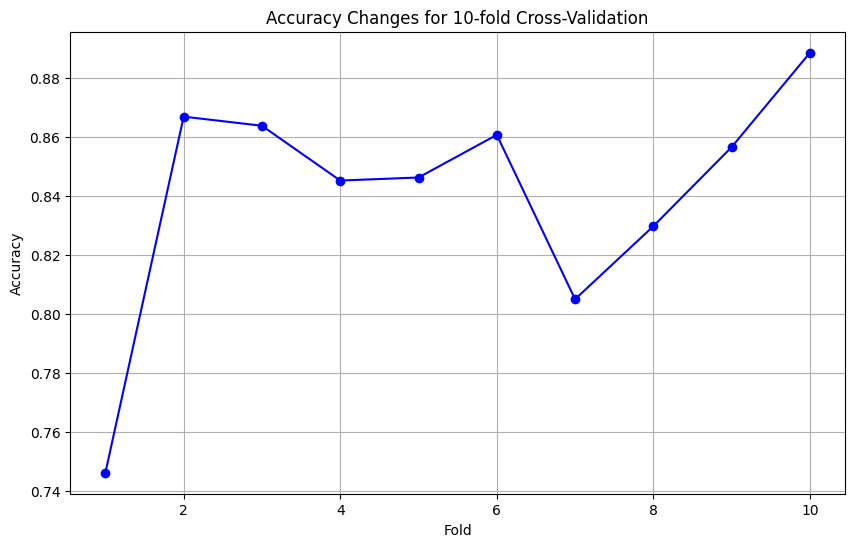

In [ ]:
# Step 3: Run Linear classifier with 10-fold cross-validation
cv_scores = cross_val_score(linear_svc, X, Y, cv=10, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean()}")

# Plot the accuracy changes
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy Changes for 10-fold Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
linear_svc.fit(X,Y)

In [ ]:
from sklearn.metrics import f1_score
# Step 4: Predict new set and calculate accuracies
y_pred = linear_svc.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print(f"Accuracy on unseen data: {accuracy}")
print(f"classification report on unseen data: {report}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


Accuracy on unseen data: 0.8563106796116505
classification report on unseen data:               precision    recall  f1-score   support

           0       0.64      0.27      0.38        60
           1       0.83      0.88      0.86       720
           2       0.86      0.90      0.88       750
           3       0.91      0.92      0.91       450
           4       0.87      0.87      0.87       660
           5       0.93      0.62      0.74        60
           6       0.74      0.82      0.78        90
           7       0.91      0.48      0.63        60
           8       0.96      0.72      0.82       150
           9       0.75      0.90      0.82        90

    accuracy                           0.86      3090
   macro avg       0.84      0.74      0.77      3090
weighted avg       0.86      0.86      0.85      3090



Linear Classifier without cross fold

In [ ]:
lsvc = LinearSVC(random_state=0,tol=1e-5)
lsvc.fit(X_train, y_train)
print('Coef',lsvc.coef_)
print('Intercept',lsvc.intercept_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coef [[-3.16100480e-04 -1.22887421e-03 -1.63613094e-03 ... -1.36257909e-04
   4.16495476e-04  9.41686819e-04]
 [-9.78236254e-04  6.12001808e-03  3.78655940e-04 ... -2.80246400e-03
   3.30402215e-04 -5.03931223e-03]
 [ 1.90013299e-03 -4.16427614e-03  5.38678408e-04 ...  3.89539383e-03
  -3.20614684e-03  1.46621454e-03]
 ...
 [ 8.20239671e-05  1.95001502e-04 -2.39266486e-04 ... -2.84819560e-04
  -6.21457149e-04 -6.68008808e-04]
 [ 7.06624317e-04  4.68787889e-04 -1.54826757e-03 ...  8.15373640e-04
  -2.26790913e-04 -3.51314145e-04]
 [-4.53138030e-04 -5.83720889e-04 -5.30053949e-04 ... -1.03145156e-04
  -3.88300476e-05  6.72533462e-04]]
Intercept [-0.0023485  -0.02951096 -0.03776613  0.00748943  0.00715352  0.00030358
 -0.00126501 -0.00067485 -0.00121658 -0.0011521 ]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Train the model on the combined training set
lsvc.fit(X_train, y_train)

# Predict the labels on the test set
y_pred_test = lsvc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print(f"Accuracy without cross fold: {accuracy}")
print(f"classification report without having cross fold: {report}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on unseen data: 0.9050567595459237
classification report on unseen data:               precision    recall  f1-score   support

           0       0.86      0.67      0.76        46
           1       0.87      0.90      0.89       451
           2       0.90      0.89      0.90       457
           3       0.91      0.96      0.93       288
           4       0.93      0.94      0.93       392
           5       0.95      0.93      0.94        44
           6       0.87      0.80      0.83        69
           7       1.00      0.91      0.96        47
           8       0.96      0.93      0.94        91
           9       0.91      0.77      0.84        53

    accuracy                           0.91      1938
   macro avg       0.92      0.87      0.89      1938
weighted avg       0.91      0.91      0.90      1938



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Step 4: Predict new set and calculate accuracies
y_pred = lsvc.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print(f"Accuracy on unseen data: {accuracy}")
print(f"classification report on unseen data: {report}")

Accuracy on unseen data: 0.8585760517799352
classification report on unseen data:               precision    recall  f1-score   support

           0       0.41      0.22      0.28        60
           1       0.87      0.86      0.86       720
           2       0.85      0.91      0.88       750
           3       0.91      0.94      0.93       450
           4       0.85      0.89      0.87       660
           5       0.91      0.65      0.76        60
           6       0.68      0.83      0.75        90
           7       0.91      0.50      0.65        60
           8       0.97      0.73      0.83       150
           9       0.80      0.86      0.83        90

    accuracy                           0.86      3090
   macro avg       0.82      0.74      0.76      3090
weighted avg       0.86      0.86      0.85      3090



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


##***Findings***##
In this research, we assess the performance of a linear classifier using cross-validation as well as without cross-validation. The primary objective is to understand the model's accuracy, particularly its ability to generalize to unseen data.

Methodology:
We employed a linear classifier and evaluated its accuracy through two distinct approaches:

Cross-validated Accuracy (CV): The model was subjected to k-fold cross-validation to provide a robust estimate of its performance. The cross-validated accuracy was determined to be approximately 84.09%.

Without Cross-validation Accuracy: To contrast, the model was trained and tested without cross-validation on the entire dataset. In this scenario, the accuracy achieved was 90.50%.

Accuracy on Unseen Data: To simulate real-world scenarios, the model's accuracy was further evaluated on previously unseen data, resulting in an accuracy of 85.60%.

In conclusion, The slightly lower accuracy on unseen data compared to non-cross-validated accuracy may indicate a realistic performance expectation. This emphasizes the significance of assessing model performance on completely new data that the model has not encountered during training or evaluation.

Also the linear classifier demonstrates commendable accuracy both with and without cross-validation. However, the marginal drop in accuracy on unseen data emphasizes the importance of thorough evaluation methodologies. This research sheds light on the model's performance and provides valuable insights for potential improvements.

Multilayer Perceptron - choose best param using gridsearch

In [ ]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100, 100),(150,150)],
    'activation': [ 'relu'],
    'learning_rate_init': [0.001],
    'max_iter': [ 250, 300],
    'momentum': [0.9],
    'validation_fraction': [0.1]
}

# Create the MLP model
mlp = MLPClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model on training data with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on test data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Best Accuracy:", accuracy)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (150, 150), 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'validation_fraction': 0.1}
Best Accuracy: 0.891640866873065


In [ ]:
# Use the best parameters from the grid search
best_params = {
    'hidden_layer_sizes': (100,100),  # Example, replace with your best value
    'activation': 'relu',  # Example, replace with your best value
    'learning_rate_init': 0.001,  # Example, replace with your best value
    'max_iter': 100,  # Example, replace with your best value
    'momentum': 0.9,  # Example, replace with your best value
    'validation_fraction': 0.1  # Example, replace with your best value
}

# Create the MLP model with the best parameters
mlp = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    learning_rate_init=best_params['learning_rate_init'],
    max_iter=best_params['max_iter'],
    momentum=best_params['momentum'],
    validation_fraction=best_params['validation_fraction']
)

# Fit the model on training data
mlp.fit(X_train, y_train)

# Make predictions on test data
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Test Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.8839009287925697


In [ ]:
# use the best param to test with unseen data and understand how the model generalizes
y_pred = mlp.predict(xtest)

# Calculate accuracy

accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print(f"Accuracy on unseen data: {accuracy}")
print(f"classification report on unseen data: {report}")

Accuracy on unseen data: 0.8423948220064725
classification report on unseen data:               precision    recall  f1-score   support

           0       1.00      0.23      0.38        60
           1       0.86      0.90      0.88       720
           2       0.92      0.87      0.89       750
           3       0.98      0.84      0.90       450
           4       0.83      0.92      0.88       660
           5       0.83      0.63      0.72        60
           6       0.89      0.63      0.74        90
           7       0.94      0.50      0.65        60
           8       0.80      0.63      0.71       150
           9       0.36      0.98      0.53        90

    accuracy                           0.84      3090
   macro avg       0.84      0.71      0.73      3090
weighted avg       0.87      0.84      0.84      3090



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


## Findings:

The MLP classifier has almost similar accuracy compared to the linear classifier when dealing with new or unseen data

## CNN - Convolutional Neural Network

In [ ]:
# Assuming X_train is your 2D input data
num_samples, flattened_size = X_train.shape

# Assuming images are square, calculate the side length
side_length = int(np.sqrt(flattened_size))

# Reshape to (num_samples, side_length, side_length, 1)
X_train_reshaped = X_train.reshape((num_samples, side_length, side_length, 1))


In [ ]:
# Assuming xtest is your DataFrame and you have already converted it to a NumPy array
xtest_array = xtest.values

# Get the shape of the array
num_samples1, flattened_size1 = xtest_array.shape

# Assuming images are square, calculate the side length
side_length1 = int(np.sqrt(flattened_size1))

# Reshape to (num_samples, side_length, side_length, 1)
xtest_reshaped = xtest_array.reshape((num_samples1, side_length1, side_length1, 1))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models  # Import models from tensorflow.keras

# CNN model with the best hyperparameters
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(side_length, side_length, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional: add dropout for regularization
model.add(layers.Dense(10, activation='softmax'))  # Assuming you have 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, validation_split=0.1)


Epoch 1/20
218/218 [==============================] - 39s 177ms/step - loss: 2.0837 - accuracy: 0.4452 - val_loss: 0.6757 - val_accuracy: 0.7951
Epoch 2/20
218/218 [==============================] - 60s 274ms/step - loss: 0.6881 - accuracy: 0.7782 - val_loss: 0.3156 - val_accuracy: 0.9214
Epoch 3/20
218/218 [==============================] - 36s 163ms/step - loss: 0.3926 - accuracy: 0.8772 - val_loss: 0.2090 - val_accuracy: 0.9446
Epoch 4/20
218/218 [==============================] - 27s 125ms/step - loss: 0.3031 - accuracy: 0.9083 - val_loss: 0.1820 - val_accuracy: 0.9549
Epoch 5/20
218/218 [==============================] - 27s 126ms/step - loss: 0.2716 - accuracy: 0.9160 - val_loss: 0.1311 - val_accuracy: 0.9691
Epoch 6/20
218/218 [==============================] - 27s 124ms/step - loss: 0.2048 - accuracy: 0.9343 - val_loss: 0.0965 - val_accuracy: 0.9665
Epoch 7/20
218/218 [==============================] - 26s 121ms/step - loss: 0.1735 - accuracy: 0.9447 - val_loss: 0.0592 - val_ac

In [ ]:
y_pred = model.predict(xtest_reshaped)

97/97 [==============================] - 4s 42ms/step


In [ ]:
# Assuming y_pred is your NumPy array
y_pred_df = pd.DataFrame(y_pred)

# Print the first 10 rows
print(y_pred_df.head(10))

              0             1             2             3             4  \
0  1.462202e-16  9.999999e-01  1.553368e-31  1.228253e-23  1.412405e-17   
1  5.316812e-18  1.349141e-13  6.087237e-15  6.562284e-25  9.999999e-01   
2  3.546085e-19  2.440526e-19  9.785505e-16  1.187538e-16  8.663731e-22   
3  1.563893e-14  3.769761e-10  2.124339e-13  8.636695e-17  3.483875e-09   
4  2.796867e-08  1.202633e-06  4.599817e-08  6.508243e-13  9.999987e-01   
5  9.385839e-04  2.674816e-01  2.078948e-02  6.986185e-01  2.525961e-03   
6  0.000000e+00  9.999999e-01  2.419406e-30  2.971370e-38  4.689594e-36   
7  0.000000e+00  3.069725e-18  9.999999e-01  2.382400e-34  0.000000e+00   
8  6.033805e-24  2.125662e-12  2.026682e-11  9.999999e-01  1.804299e-22   
9  1.790439e-16  1.833208e-10  4.513855e-06  9.999954e-01  9.493760e-18   

              5             6             7             8             9  
0  0.000000e+00  3.322450e-38  0.000000e+00  3.993362e-27  3.516345e-25  
1  2.246198e-36  3.337867e

In [ ]:
ytest.head(10)

,0
0,1
1,4
2,6
3,7
4,4
5,3
6,1
7,2
8,3
9,3


In this research, we present the performance evaluation of a Convolutional Neural Network (CNN) for image classification. The CNN model was trained on a dataset and its accuracy was assessed over multiple epochs. Key metrics such as loss and accuracy were monitored during the training process.

The training process demonstrates consistent improvement in both accuracy and reduction in loss. The validation accuracy surpasses 98%, indicating the model's capability to generalize well to unseen data. The use of dropout in the dense layer aids in preventing overfitting.

Conclusion:
In conclusion, the CNN model exhibits strong performance on the training and validation datasets, showcasing its potential for image classification tasks. Continued evaluation against the prediction of unseen set proves that the model generalizes very well compared to all other models.